# **Vehicle sales Prediction**





##### Collaborators: Suryateja Konduri, Rohan Ambati, Manoj Kumar Bashaboina, VVS Rajesh, Pravalika Sure

#                                                                      Introduction

The primary goal of this project is to explore and analyze vehicle sales data to uncover meaningful insights. Through this notebook, we will walk through the essential stages of the data science lifecycle, focusing on data cleaning, preprocessing, and analysis. Vehicle sales data is crucial for understanding trends in consumer behavior, market dynamics, and the overall health of the automotive industry.

**Why is this important ?**

The automotive sector significantly impacts the global economy, influencing employment, transportation, and technological advancements. Analyzing sales data enables manufacturers, policymakers, and businesses to make informed decisions, such as identifying trends, optimizing supply chains, and predicting future demand.

This notebook emphasizes preprocessing tasks, such as handling missing values and preparing the data for analysis. It is a foundational step toward generating robust models and actionable insights. Key steps include:

1. **Data Collection**: Gathering comprehensive vehicle salesrecords.
2. **Data Cleaning**: Handling missing values and ensuring data quality.
3. **Exploratory Data Analysis**: Uncovering patterns and trends.
4. **Modeling and Analysis**: Applying statistical and machine learning techniques.
5. **Insights and Recommendations**: Delivering actionable outcomes.

Through this workflow, the project aims to provide a data-driven approach to understanding vehicle sales patterns and their implications for the industry.

# **Import Data and required libraries**

Importing Necessary librarires fro Data cleaning and Preprocessing.

NumPy: Provides powerful tools for numerical computing, including support for arrays, mathematical functions, and linear algebra operations.

Pandas: Facilitates data manipulation and analysis through its DataFrame and Series data structures.

Matplotlib: Enables the creation of static, interactive, and dynamic visualizations in Python.

Seaborn: Builds on Matplotlib to create aesthetically pleasing statistical visualizations with ease.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and Cleaning

Importing Vehicle sales Dataset

In [ ]:
vehicle_sales = pd.read_csv(r"C:\Users\manoj\Downloads\archive\car_prices.csv")

This line of code retrieves the column names of the DataFrame "vehicle_sales"

In [ ]:
vehicle_sales.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [ ]:
vehicle_sales.head(10) #Preview of the dataset

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,34.0,14943.0,black,black,the hertz corporation,69000.0,65000.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,wauffafl3en030343,ca,42.0,9557.0,white,black,audi mission viejo,32100.0,32250.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300.0,17500.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)


In [ ]:
vehicle_sales.shape #retrieves the dimensions of the DataFrame

(558837, 16)

In [ ]:
vehicle_sales['year'].unique() #retrieves all unique values from the 'year' column

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000, 1999, 1998, 1995, 1996, 1997, 1987,
       1994, 1993, 1992, 1989, 1991, 1990, 1986, 1985, 1988, 1984, 1982,
       1983], dtype=int64)

In [ ]:
# Create a dictionary for column descriptions
data_description = {
    'Column Name': [
        'year', 'make', 'model', 'trim', 'body',
        'transmission', 'vin', 'state', 'condition',
        'odometer', 'color', 'interior', 'seller',
        'mmr', 'sellingprice', 'saledate'
    ],
    'Description': [
        'The year the car was manufactured.',
        'The brand of the car.'
        'The specific model of the car.'
        'A variant or version of the model with different features.'
        'The type or category of the car (e.g., SUV, Sedan).'
        'Type of transmission (automatic or manual).'
        'Vehicle Identification Number (unique identifier for each car).'
        'The state where the car is sold.'
        'The condition of the car when sold.'
        'Number of miles the car has been driven.'
        'The exterior color of the car.'
        'The interior color/material of the car.'
        'The seller of the car.'
        'Manheim Market Report value (provides a price benchmark for the vehicle).'
        'The actual selling price of the car.'
        'The date the car was sold.'
    ]
}

#Organising the dataset

In [ ]:
vehicle_sales.columns = vehicle_sales.columns.str.title() #modifies the column names of the DataFrame by capitalizing the first letter of each word
print(vehicle_sales.columns)

Index(['Year', 'Make', 'Model', 'Trim', 'Body', 'Transmission', 'Vin', 'State',
       'Condition', 'Odometer', 'Color', 'Interior', 'Seller', 'Mmr',
       'Sellingprice', 'Saledate'],
      dtype='object')


In [ ]:
vehicle_sales.dtypes #provides the data types of each column

Year              int64
Make             object
Model            object
Trim             object
Body             object
Transmission     object
Vin              object
State            object
Condition       float64
Odometer        float64
Color            object
Interior         object
Seller           object
Mmr             float64
Sellingprice    float64
Saledate         object
dtype: object

In [ ]:
#Parsing the string
vehicle_sales['Model'] = vehicle_sales['Model'].astype(str)

In [ ]:
# Rename columns
vehicle_sales = vehicle_sales.rename(columns={
    "Make": "Car Brand Name",
    "Mmr": "Market Price",
    "Saledate": "Sale Date",
    "Sellingprice": "Selling Price",
    "State": "State Code",
    "Vin": "Vehicle Identification Number",
})

In [ ]:
vehicle_sales.loc[500] #retrieves the row at index 500

Year                                                                2013
Car Brand Name                                                Land Rover
Model                                                 Range Rover Evoque
Trim                                                        Pure Premium
Body                                                                 SUV
Transmission                                                   automatic
Vehicle Identification Number                          salvr2bg6dh755364
State Code                                                            ca
Condition                                                            5.0
Odometer                                                          5403.0
Color                                                               gray
Interior                                                           black
Seller                                      land rover north america llc
Market Price                                       

In [ ]:
# Transform the State Code column
vehicle_sales["State Code"] = vehicle_sales["State Code"].str.upper()
vehicle_sales["State Name"] = vehicle_sales["State Code"]
# Create State column from State Code
def state(data):
    match data:
        case "AB":
            return "Alberta(Canada)"
        case "AL":
            return "Alabama"
        case "AK":
            return "Alaska"
        case "AZ":
            return "Arizona"
        case "AR":
            return "Arkansas"
        case "CA":
            return "California"
        case "CO":
            return "Colorado"
        case "CT":
            return "Connecticut"
        case "DE":
            return "Delaware"
        case "FL":
            return "Florida"
        case "GA":
            return "Georgia"
        case "HI":
            return "Hawaii"
        case "ID":
            return "Idaho"
        case "IL":
            return "Illinois"
        case "IN":
            return "Indiana"
        case "IA":
            return "Iowa"
        case "KS":
            return "Kansas"
        case "KY":
            return "Kentucky"
        case "LA":
            return "Louisiana"
        case "ME":
            return "Maine"
        case "MD":
            return "Maryland"
        case "MA":
            return "Massachusetts"
        case "MI":
            return "Michigan"
        case "MN":
            return "Minnesota"
        case "MS":
            return "Mississippi"
        case "MO":
            return "Missouri"
        case "MT":
            return "Montana"
        case "NE":
            return "Nebraska"
        case "NV":
            return "Nevada"
        case "NH":
            return "New Hampshire"
        case "NJ":
            return "New Jersey"
        case "NM":
            return "New Mexico"
        case "NS":
            return "Nova Scotia(Canada)"
        case "NY":
            return "New York"
        case "NC":
            return "North Carolina"
        case "ND":
            return "North Dakota"
        case "OH":
            return "Ohio"
        case "OK":
            return "Oklahoma"
        case "ON":
            return "Ontario (Canada)"
        case "OR":
            return "Oregon"
        case "PA":
            return "Pennsylvania"
        case "QC":
            return "Quebec (Canada)"
        case "RI":
            return "Rhode Island"
        case "SC":
            return "South Carolina"
        case "SD":
            return "South Dakota"
        case "TN":
            return "Tennessee"
        case "TX":
            return "Texas"
        case "UT":
            return "Utah"
        case "VT":
            return "Vermont"
        case "VA":
            return "Virginia"
        case "WA":
            return "Washington"
        case "WV":
            return "West Virginia"
        case "WI":
            return "Wisconsin"
        case "WY":
            return "Wyoming"
        case "DC":
            return "District of Columbia"
        case "PR":
            return "Puerto Rico"
        case "VI":
            return "Virgin Islands"
        case other:
            return "Others"
vehicle_sales["State Name"] = vehicle_sales["State Code"].apply(lambda x: state(x))

In [ ]:
 vehicle_sales["State Name"].unique() #retrieves all unique values from the "State Name" column

array(['California', 'Texas', 'Pennsylvania', 'Minnesota', 'Arizona',
       'Wisconsin', 'Tennessee', 'Maryland', 'Florida', 'Nebraska',
       'New Jersey', 'Nevada', 'Ohio', 'Michigan', 'Georgia', 'Virginia',
       'South Carolina', 'North Carolina', 'Indiana', 'Illinois',
       'Colorado', 'Utah', 'Missouri', 'New York', 'Massachusetts',
       'Puerto Rico', 'Oregon', 'Louisiana', 'Washington', 'Hawaii',
       'Quebec (Canada)', 'Alberta(Canada)', 'Ontario (Canada)',
       'Oklahoma', 'Mississippi', 'New Mexico', 'Alabama', 'Others',
       'Nova Scotia(Canada)'], dtype=object)

In [ ]:
vehicle_sales.describe(include = 'all') #generates a summary of descriptive statistics for all columns

,Year,Car Brand Name,Model,Trim,Body,Transmission,Vehicle Identification Number,State Code,Condition,Odometer,Color,Interior,Seller,Market Price,Selling Price,Sale Date,State Name
count,558837.000000,548536,558837,548186,545642,493485,558833,558837,547017.000000,558743.000000,558088,558088,558837,558799.000000,558825.000000,558825,558837
unique,NaN,96,974,1963,87,4,550297,64,NaN,NaN,46,17,14263,NaN,NaN,3766,39
top,NaN,Ford,Altima,Base,Sedan,automatic,automatic,FL,NaN,NaN,black,black,nissan-infiniti lt,NaN,NaN,Tue Feb 10 2015 01:30:00 GMT-0800 (PST),Florida
freq,NaN,93554,19349,55817,199437,475915,22,82945,NaN,NaN,110970,244329,19693,NaN,NaN,5334,82945
mean,2010.038927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.672365,68320.017767,NaN,NaN,NaN,13769.377495,13611.358810,NaN,NaN
std,3.966864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.402832,53398.542821,NaN,NaN,NaN,9679.967174,9749.501628,NaN,NaN
min,1982.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,25.000000,1.000000,NaN,NaN
25%,2007.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,28371.000000,NaN,NaN,NaN,7100.000000,6900.000000,NaN,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,52254.000000,NaN,NaN,NaN,12250.000000,12100.000000,NaN,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.000000,99109.000000,NaN,NaN,NaN,18300.000000,18200.000000,NaN,NaN


In [ ]:
vehicle_sales.count() #returns the number of non-missing  values in each column

Year                             558837
Car Brand Name                   548536
Model                            558837
Trim                             548186
Body                             545642
Transmission                     493485
Vehicle Identification Number    558833
State Code                       558837
Condition                        547017
Odometer                         558743
Color                            558088
Interior                         558088
Seller                           558837
Market Price                     558799
Selling Price                    558825
Sale Date                        558825
State Name                       558837
dtype: int64

In [ ]:
vehicle_sales.isnull().sum() #calculates the total number of missing (NaN) values in each column

Year                                 0
Car Brand Name                   10301
Model                                0
Trim                             10651
Body                             13195
Transmission                     65352
Vehicle Identification Number        4
State Code                           0
Condition                        11820
Odometer                            94
Color                              749
Interior                           749
Seller                               0
Market Price                        38
Selling Price                       12
Sale Date                           12
State Name                           0
dtype: int64

Identifying Null Values

<Axes: >

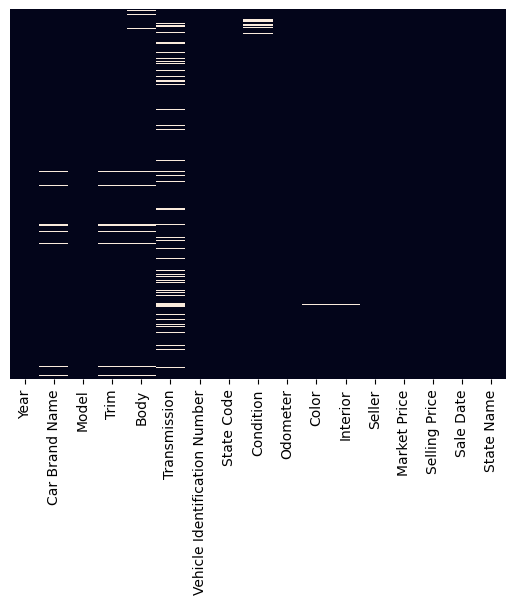

In [ ]:
# Visualizing Null Values
sns.heatmap(vehicle_sales.isnull() ,yticklabels= False, cbar = False)

In [ ]:
missing_data = vehicle_sales[vehicle_sales.isna().any(axis = 1)] #extracts all rows from the vehicle_sales DataFrame that contain at least one missing (NaN) value, and stores them in a new DataFrame called missing_data.
missing_data.shape

(86424, 17)

In [ ]:
percentage_missing = missing_data.shape[0]/vehicle_sales.shape[0]
print(f'{percentage_missing:.4f}')

0.1546


# DATA CLEANING
**Dropping Rows with Null Values for following Columns**

In [ ]:
vehicle_sales = vehicle_sales.dropna(subset=['Car Brand Name','Condition','Sale Date','Odometer'])

In [ ]:
# Remove duplicate rows from the DataFrame
vehicle_sales = vehicle_sales.drop_duplicates()

In [ ]:
# Drop duplicates as VIN should be unique by default
vehicle_sales = vehicle_sales.drop_duplicates(subset=['Vehicle Identification Number'], keep='first')

In [ ]:
#Tackling with Case sensitive issues
vehicle_sales[['Car Brand Name', 'Model', 'Body','Trim']] = vehicle_sales[['Car Brand Name', 'Model', 'Body','Trim']].apply(lambda x: x.str.upper())

In [ ]:
vehicle_sales['Car Brand Name'].unique()

array(['KIA', 'BMW', 'VOLVO', 'NISSAN', 'CHEVROLET', 'AUDI', 'FORD',
       'BUICK', 'CADILLAC', 'ACURA', 'LEXUS', 'HYUNDAI', 'INFINITI',
       'JEEP', 'MERCEDES-BENZ', 'MITSUBISHI', 'MAZDA', 'MINI',
       'LAND ROVER', 'LINCOLN', 'JAGUAR', 'VOLKSWAGEN', 'TOYOTA',
       'SUBARU', 'SCION', 'PORSCHE', 'DODGE', 'FIAT', 'CHRYSLER',
       'FERRARI', 'HONDA', 'GMC', 'RAM', 'SMART', 'BENTLEY', 'PONTIAC',
       'SATURN', 'MASERATI', 'MERCURY', 'HUMMER', 'LANDROVER', 'MERCEDES',
       'SAAB', 'SUZUKI', 'OLDSMOBILE', 'DODGE TK', 'GEO', 'ROLLS-ROYCE',
       'ISUZU', 'FORD TK', 'PLYMOUTH', 'VW', 'FORD TRUCK', 'TESLA',
       'AIRSTREAM', 'DOT', 'GMC TRUCK', 'ASTON MARTIN', 'MERCEDES-B',
       'FISKER', 'DAEWOO', 'LAMBORGHINI', 'LOTUS'], dtype=object)



---


Standardizing the 'Car Brand Name' column in the vehicle_sales DataFrame by clustering similar brand names and mapping them to a representative (shortest) standardized name. It ensures consistency in brand names, even if there are variations or misspellings in the data





In [ ]:
#Cleaning irregularities in Car Brand Name
from difflib import get_close_matches

# Convert Car Brand Name to uppercase
vehicle_sales['Car Brand Name'] = vehicle_sales['Car Brand Name'].str.upper()

# Extract the 'Car Brand Name' column from the DataFrame and convert it into a Python list
normalized_brands = vehicle_sales['Car Brand Name'].tolist()

# Function to cluster similar names
def cluster_brands(brands):
    clusters = []
    seen = set()

    for brand in brands:
        if brand not in seen:
            close_matches = get_close_matches(brand, brands, n=10, cutoff=0.6)
            # Use a set to avoid duplicate processing
            cluster = set(close_matches)
            cluster.add(brand)  # Add the original brand
            clusters.append(cluster)
            seen.update(cluster)

    return clusters

# Create clusters of similar brands
brand_clusters = cluster_brands(normalized_brands)

# Generate standardized names by finding the most common pattern
def get_representative_name(cluster):
    # Extract potential representatives based on common patterns
    representative = min(cluster, key=len)  # Choose the shortest name for simplicity
    return representative

# Generate standardized names and overwrite the original column
standardized_mapping = {}
for cluster in brand_clusters:
    representative_name = get_representative_name(cluster)
    for brand in cluster:
        standardized_mapping[brand] = representative_name

# Replace the Car Brand Name with standardized names
vehicle_sales['Car Brand Name'] = vehicle_sales['Car Brand Name'].map(standardized_mapping)

In [ ]:
vehicle_sales['Car Brand Name'].unique() #retrieves all the unique (distinct) values from the 'Car Brand Name'

array(['KIA', 'BMW', 'VOLVO', 'NISSAN', 'CHEVROLET', 'AUDI', 'FORD',
       'BUICK', 'CADILLAC', 'ACURA', 'LOTUS', 'HYUNDAI', 'INFINITI',
       'JEEP', 'MERCEDES-BENZ', 'MITSUBISHI', 'MAZDA', 'MINI',
       'LAND ROVER', 'LINCOLN', 'JAGUAR', 'VOLKSWAGEN', 'TOYOTA',
       'SUBARU', 'SCION', 'PORSCHE', 'DODGE', 'FIAT', 'CHRYSLER',
       'FERRARI', 'HONDA', 'GMC', 'RAM', 'SMART', 'BENTLEY', 'PONTIAC',
       'SATURN', 'MASERATI', 'MERCURY', 'HUMMER', 'LANDROVER', 'MERCEDES',
       'SAAB', 'SUZUKI', 'OLDSMOBILE', 'GEO', 'ROLLS-ROYCE', 'ISUZU',
       'PLYMOUTH', 'VW', 'GMC TRUCK', 'TESLA', 'AIRSTREAM', 'DOT',
       'ASTON MARTIN', 'FISKER', 'DAEWOO', 'LAMBORGHINI'], dtype=object)

In [ ]:
brand_mapping = {
    'GMC TRUCK': 'GMC',
    'LANDROVER': 'LAND ROVER',
    'MERCEDES': 'MERCEDES-BENZ',
    'VW': 'VOLKSWAGEN'
}

# Replace brand names using the mapping
vehicle_sales['Car Brand Name'] = vehicle_sales['Car Brand Name'].replace(brand_mapping)

In [ ]:
vehicle_sales['Car Brand Name'].value_counts() #counts the number of occurrences of each unique value in the 'Car Brand Name' column

Car Brand Name
FORD             91023
CHEVROLET        58263
NISSAN           52539
TOYOTA           38575
DODGE            29848
HONDA            26145
HYUNDAI          21257
BMW              19984
KIA              17697
CHRYSLER         16876
MERCEDES-BENZ    16518
INFINITI         15003
JEEP             14804
VOLKSWAGEN       12034
LOTUS            11602
GMC              10141
MAZDA             8165
CADILLAC          7183
ACURA             5665
AUDI              5623
LINCOLN           5576
SUBARU            4914
BUICK             4865
RAM               4452
PONTIAC           4207
MITSUBISHI        4105
VOLVO             3573
MINI              3098
SATURN            2611
MERCURY           1895
LAND ROVER        1802
SCION             1617
JAGUAR            1355
PORSCHE           1352
SUZUKI            1020
FIAT               845
HUMMER             752
SAAB               446
SMART              386
OLDSMOBILE         348
ISUZU              186
MASERATI           131
BENTLEY            

Dimensionality Reduction on Car Brand Name

In [ ]:
# Count occurrences of each car brand
brand_counts = vehicle_sales['Car Brand Name'].value_counts()

# Create a mapping for brands with sales less than 1000
to_replace = brand_counts[brand_counts < 1000].index

# Replace those brands with "Others" in the original DataFrame
vehicle_sales['Car Brand Name'] = vehicle_sales['Car Brand Name'].replace(to_replace, 'Others')

vehicle_sales['Car Brand Name'].value_counts()

Car Brand Name
FORD             91023
CHEVROLET        58263
NISSAN           52539
TOYOTA           38575
DODGE            29848
HONDA            26145
HYUNDAI          21257
BMW              19984
KIA              17697
CHRYSLER         16876
MERCEDES-BENZ    16518
INFINITI         15003
JEEP             14804
VOLKSWAGEN       12034
LOTUS            11602
GMC              10141
MAZDA             8165
CADILLAC          7183
ACURA             5665
AUDI              5623
LINCOLN           5576
SUBARU            4914
BUICK             4865
RAM               4452
PONTIAC           4207
MITSUBISHI        4105
VOLVO             3573
Others            3348
MINI              3098
SATURN            2611
MERCURY           1895
LAND ROVER        1802
SCION             1617
JAGUAR            1355
PORSCHE           1352
SUZUKI            1020
Name: count, dtype: int64

**Filling the Missing Null Values using various **imputation methods**

In [ ]:
# Function to fill missing 'Model' values
def fill_missing_model(row):
    if pd.isnull(row['Model']):  # Check if the 'Model' value is missing (NaN)
        # Filter the DataFrame for rows with the same 'Year', 'Car Brand Name', and 'Body'
        filtered = vehicle_sales[(vehicle_sales['Year'] == row['Year']) &
                                 (vehicle_sales['Car Brand Name'] == row['Car Brand Name']) &
                                 (vehicle_sales['Body'] == row['Body'])]

        # Get the mode of the 'Model' column in the filtered DataFrame
        if not filtered.empty:
            model_missing_model = filtered['Model'].mode()
            if not model_missing_model.empty:
                # Return the first mode value if multiple are found
                return model_missing_model[0]
    return row['Model']  # Return the original 'Model' if it's not missing or no match is found

# Apply the function to fill missing 'Model' values row by row
vehicle_sales['Model'] = vehicle_sales.apply(fill_missing_model, axis=1)



In [ ]:
# Function to fill missing 'Trim' values
def fill_missing_trim(row):
    if pd.isnull(row['Trim']):  # Check if the 'Trim' value is missing (NaN)
        # Filter the DataFrame for rows with the same 'Car Brand Name' and 'Model'
        filtered = vehicle_sales[(vehicle_sales['Car Brand Name'] == row['Car Brand Name']) &
                                 (vehicle_sales['Model'] == row['Model'])]

        # Get the mode of the 'Trim' column in the filtered DataFrame
        if not filtered.empty:
            mode_trim = filtered['Trim'].mode()  # Find the most frequent 'Trim'
            if not mode_trim.empty:
                # Return the first mode value if multiple are found
                return mode_trim[0]
    return row['Trim']  # Return the original 'Trim' if it's not missing or no match is found

# Apply the function to fill missing 'Trim' values row by row
vehicle_sales['Trim'] = vehicle_sales.apply(fill_missing_trim, axis=1)




In [ ]:
# Function to fill missing 'Body' values
def fill_missing_body(row):
    if pd.isnull(row['Body']):  # Check if the 'Body' value is missing (NaN)
        # Filter the DataFrame for rows with the same 'Model', 'Car Brand Name', and 'Trim'
        filtered = vehicle_sales[(vehicle_sales['Model'] == row['Model']) &
                                 (vehicle_sales['Car Brand Name'] == row['Car Brand Name']) &
                                 (vehicle_sales['Trim'] == row['Trim'])]

        # Get the mode of the 'Body' column in the filtered DataFrame
        if not filtered.empty:
            missing_body = filtered['Body'].mode()  # Find the most frequent 'Body' type
            if not missing_body.empty:
                # Return the first mode value if multiple are found
                return missing_body[0]
    return row['Body']  # Return the original 'Body' if it's not missing or no match is found

# Apply the function to fill missing 'Body' values row by row
vehicle_sales['Body'] = vehicle_sales.apply(fill_missing_body, axis=1)


In [ ]:
# Fill missing transmission types with the mode
vehicle_sales['Transmission'].fillna(vehicle_sales['Transmission'].mode()[0], inplace=True)

C:\Users\manoj\AppData\Local\Temp\ipykernel_4128\14817921.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vehicle_sales['Transmission'].fillna(vehicle_sales['Transmission'].mode()[0], inplace=True)


In [ ]:
#Filling Null Values in Color
def fill_color(row):
    # Fill color if it is NaN
    if pd.isna(row['Color']):
        most_common_color = vehicle_sales[
            (vehicle_sales['Car Brand Name'] == row['Car Brand Name']) &
            (vehicle_sales['Model'] == row['Model'])
        ]['Color'].mode()
        row['Color'] = most_common_color[0] if not most_common_color.empty else row['Color']

    return row
vehicle_sales = vehicle_sales.apply(fill_color, axis=1)

In [ ]:
#Filling Null Values in Interior
def fill_interior(row):
    # Fill interior if it is NaN
    if pd.isna(row['Interior']):
        most_common_interior = vehicle_sales[
            (vehicle_sales['Car Brand Name'] == row['Car Brand Name']) &
            (vehicle_sales['Model'] == row['Model'])
        ]['Interior'].mode()
        row['Interior'] = most_common_interior[0] if not most_common_interior.empty else row['Interior']

    return row
vehicle_sales = vehicle_sales.apply(fill_interior, axis=1)

In [ ]:
# Function to fill Market Price
def fill_missing_market_price(row):
    if pd.isnull(row['Market Price']):
        # Filter the DataFrame for the same year,Car Brand Name and Model
        filtered = vehicle_sales[(vehicle_sales['Year'] == row['Year']) &
                               (vehicle_sales['Car Brand Name'] == row['Car Brand Name']) &
                                 (vehicle_sales['Model'== row['Model']])]

        # Get the mean Market Price among the filtered DataFrame
        if not filtered.empty:
            mean_market_price = filtered['Market Price'].mean()
            if not mean_market_price.empty:
                # Choose the first mode in alphabetical order if there are multiple
                return mean_market_price[0]
    return row['Market Price']  # Return the original value if not missing

# Apply the function to fill missing values
vehicle_sales['Market Price'] = vehicle_sales.apply(fill_missing_market_price, axis=1)

In [ ]:
# Function to fill Selling Price
def fill_missing_selling_price(row):
    if pd.isnull(row['Market Price']):
        # Filter the DataFrame for the same year,Car Brand Name and Model
        filtered = vehicle_sales[(vehicle_sales['Year'] == row['Year']) &
                               (vehicle_sales['Car Brand Name'] == row['Car Brand Name']) &
                                 (vehicle_sales['Model'== row['Model']])]


        # Get the mean Selling Price among the filtered DataFrame
        if not filtered.empty:
            mean_selling_price = filtered['Selling Price'].mean()
            if not mean_selling_price.empty:
                # Choose the first mode in alphabetical order if there are multiple
                return mean_selling_price[0]
    return row['Selling Price']  # Return the original value if not missing

# Apply the function to fill missing values
vehicle_sales['Selling Price'] = vehicle_sales.apply(fill_missing_selling_price, axis=1)


**Cleaning the color and interior columns containing unusual values with most frequest colors**

In [ ]:
vehicle_sales['Color'].unique() #retrieves all unique values from the 'Color' column

array(['white', 'gray', 'black', 'red', 'silver', 'brown', 'beige',
       'blue', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

In [ ]:
vehicle_sales['Interior'].unique() #retrieves all unique values from the 'Interior' column

array(['black', 'beige', 'tan', 'brown', 'gray', '—', 'burgundy', 'white',
       'silver', 'off-white', 'blue', 'red', 'yellow', 'green', 'purple',
       'orange', 'gold'], dtype=object)

In [ ]:
# Cleaning irregular values
# Step 1: Get the top 3 colors
top_colors = vehicle_sales['Color'].value_counts().head(3).index.tolist()

# Step 2: Replace '—' with a random top color
def replace_dash_with_random_color(row):
    if row['Color'] == '—':
        return np.random.choice(top_colors)  # Randomly choose one of the top colors
    return row['Color']

vehicle_sales['Color'] = vehicle_sales.apply(replace_dash_with_random_color, axis=1)

In [ ]:
# Step 1: Get the top 3 interiors
top_interiors = vehicle_sales['Interior'].value_counts().head(3).index.tolist()

# Step 2: Replace '—' in Interior with a random top interior color
def replace_dash_with_random_interior(row):
    if row['Interior'] == '—':
        return np.random.choice(top_interiors)  # Randomly choose one of the top interiors
    return row['Interior']

vehicle_sales['Interior'] = vehicle_sales.apply(replace_dash_with_random_interior, axis=1)

In [ ]:
vehicle_sales['Color'].unique() #retrieves all the unique values from the 'Color' column

array(['white', 'gray', 'black', 'red', 'silver', 'brown', 'beige',
       'blue', 'purple', 'burgundy', 'gold', 'yellow', 'green',
       'charcoal', 'orange', 'off-white', 'turquoise', 'pink', 'lime'],
      dtype=object)

In [ ]:
vehicle_sales['Interior'].unique() #retrieves all the unique values from the 'Interior' column

array(['black', 'beige', 'tan', 'brown', 'gray', 'burgundy', 'white',
       'silver', 'off-white', 'blue', 'red', 'yellow', 'green', 'purple',
       'orange', 'gold'], dtype=object)

In [ ]:
# Print rows where 'Color' or 'Interior' is '-'
rows_with_dash = vehicle_sales[(vehicle_sales['Color'] == '—') | (vehicle_sales['Interior'] == '—')]

print (len(rows_with_dash))


0


In [ ]:
vehicle_sales.isnull().sum() #calculates the total number of missing (NaN) values for each column

Year                                0
Car Brand Name                      0
Model                               0
Trim                               86
Body                             1860
Transmission                        0
Vehicle Identification Number       0
State Code                          0
Condition                           0
Odometer                            0
Color                               0
Interior                            0
Seller                              0
Market Price                        0
Selling Price                       0
Sale Date                           0
State Name                          0
dtype: int64

In [ ]:
#Drop if further Null Values exist if any
vehicle_sales = vehicle_sales.dropna(subset=['Trim', 'Body'])

<Axes: >

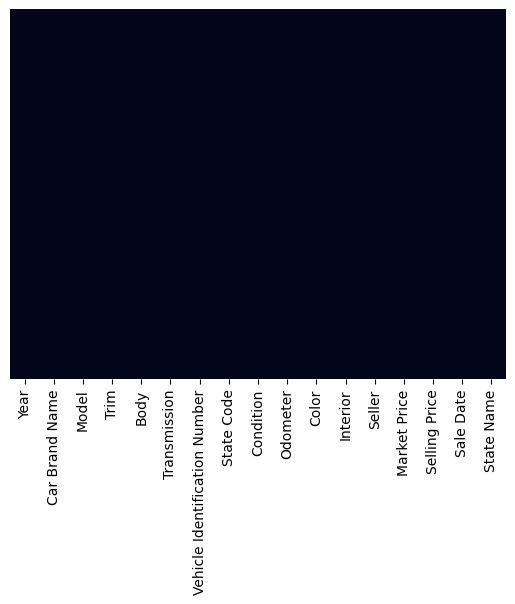

In [ ]:
#Verification of Null Values Cleaning
sns.heatmap(vehicle_sales.isnull() ,yticklabels= False, cbar = False)

In [ ]:
vehicle_sales.columns #retrieves the column names of the vehicle_sales DataFrame

Index(['Year', 'Car Brand Name', 'Model', 'Trim', 'Body', 'Transmission',
       'Vehicle Identification Number', 'State Code', 'Condition', 'Odometer',
       'Color', 'Interior', 'Seller', 'Market Price', 'Selling Price',
       'Sale Date', 'State Name'],
      dtype='object')

In [ ]:
print(vehicle_sales.head(5))


   Year Car Brand Name                Model        Trim   Body Transmission  \
0  2015            KIA              SORENTO          LX    SUV    automatic   
1  2015            KIA              SORENTO          LX    SUV    automatic   
2  2014            BMW             3 SERIES  328I SULEV  SEDAN    automatic   
3  2015          VOLVO                  S60          T5  SEDAN    automatic   
4  2014            BMW  6 SERIES GRAN COUPE        650I  SEDAN    automatic   

  Vehicle Identification Number State Code  Condition  Odometer  Color  \
0             5xyktca69fg566472         CA        5.0   16639.0  white   
1             5xyktca69fg561319         CA        5.0    9393.0  white   
2             wba3c1c51ek116351         CA       45.0    1331.0   gray   
3             yv1612tb4f1310987         CA       41.0   14282.0  white   
4             wba6b2c57ed129731         CA       43.0    2641.0   gray   

  Interior                                  Seller  Market Price  \
0    black  

In [ ]:
# Drop Unwanted Columns
columns_to_drop = ['Vehicle Identification Number', 'Seller', 'Sale Date', 'State Code']
vehicle_sales.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows of the DataFrame
vehicle_sales.head()

,Year,Car Brand Name,Model,Trim,Body,Transmission,Condition,Odometer,Color,Interior,Market Price,Selling Price,State Name
0,2015,KIA,SORENTO,LX,SUV,automatic,5.0,16639.0,white,black,20500.0,21500.0,California
1,2015,KIA,SORENTO,LX,SUV,automatic,5.0,9393.0,white,beige,20800.0,21500.0,California
2,2014,BMW,3 SERIES,328I SULEV,SEDAN,automatic,45.0,1331.0,gray,black,31900.0,30000.0,California
3,2015,VOLVO,S60,T5,SEDAN,automatic,41.0,14282.0,white,black,27500.0,27750.0,California
4,2014,BMW,6 SERIES GRAN COUPE,650I,SEDAN,automatic,43.0,2641.0,gray,black,66000.0,67000.0,California


In [ ]:
description = vehicle_sales[['Selling Price', 'Odometer', 'Market Price']].describe(include = 'all')

# Display the descriptive statistics
print(description)

       Selling Price       Odometer   Market Price
count  526875.000000  526875.000000  526875.000000
mean    13865.099957   66220.390753   14021.348897
std      9724.470623   52279.491762    9651.514646
min         1.000000       1.000000      25.000000
25%      7300.000000   27614.000000    7575.000000
50%     12400.000000   49933.000000   12500.000000
75%     18400.000000   95868.000000   18500.000000
max    230000.000000  999999.000000  182000.000000


# Potential Outlier Removals

Removing outliers is crucial as they can skew statistical metrics, distort model performance, and lead to inaccurate predictions. To handle outliers, we use:  

1. **IQR Method**: Identifies outliers as values beyond \( Q1 - 1.5 times IQR \) or \( Q3 + 1.5 times IQR \).  
2. **Isolation Forest**: Detects anomalies by isolating data points in feature space and removing those with high anomaly scores.

In [ ]:
#IQR Method
def remove_outliers(vehicle_sales, min_thresholds=None):
    cleaned_vehicle_sales_IQR = vehicle_sales.copy()  # Create a copy to avoid modifying the original DataFrame
    numerical_cols = ['Selling Price', 'Market Price', 'Odometer']

    for column in numerical_cols:
        Q1 = cleaned_vehicle_sales_IQR[column].quantile(0.25)
        Q3 = cleaned_vehicle_sales_IQR[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        min_threshold = min_thresholds.get(column, None) if min_thresholds else None

        if min_threshold is not None:
            cleaned_vehicle_sales_IQR = cleaned_vehicle_sales_IQR[
                (cleaned_vehicle_sales_IQR[column] >= lower_bound) &
                (cleaned_vehicle_sales_IQR[column] <= upper_bound) &
                (cleaned_vehicle_sales_IQR[column] >= min_threshold)
            ]
        else:
            cleaned_vehicle_sales_IQR = cleaned_vehicle_sales_IQR[
                (cleaned_vehicle_sales_IQR[column] >= lower_bound) &
                (cleaned_vehicle_sales_IQR[column] <= upper_bound)
            ]

    return cleaned_vehicle_sales_IQR

# Specify minimum thresholds if needed
min_thresholds = {
    'Selling Price': 1000,
    'Odometer': 500,
    'Market Price': 1000
}

# Clean the DataFrame
cleaned_vehicle_sales_IQR = remove_outliers(vehicle_sales, min_thresholds)

# Display the cleaned DataFrame
print(f"Cleaned data count: {len(cleaned_vehicle_sales_IQR)}")

Cleaned data count: 481707


In [ ]:
# Define and apply Isolation Forest on the IQR-cleaned DataFrame for further outlier removal
from sklearn.ensemble import IsolationForest

def remove_outliers_isolation_forest(cleaned_vehicle_sales_IQR, min_thresholds=None):
    # Create a copy of the IQR-cleaned DataFrame to avoid modifying it directly
    cleaned_vehicle_sales = cleaned_vehicle_sales_IQR.copy()
    numerical_cols = ['Selling Price', 'Market Price', 'Odometer']

    # Initialize and fit the Isolation Forest model
    iso_forest = IsolationForest(contamination=0.05)
    preds = iso_forest.fit_predict(cleaned_vehicle_sales[numerical_cols])

    # Filter only the inliers based on Isolation Forest predictions
    cleaned_vehicle_sales = cleaned_vehicle_sales[preds != -1]

    # Apply minimum thresholds if provided
    if min_thresholds:
        for column in numerical_cols:
            if column in min_thresholds:
                cleaned_vehicle_sales = cleaned_vehicle_sales[cleaned_vehicle_sales[column] >= min_thresholds[column]]

    return cleaned_vehicle_sales

# Apply Isolation Forest on the data cleaned by IQR method
vehicle_sales_cleaned = remove_outliers_isolation_forest(cleaned_vehicle_sales_IQR, min_thresholds)

In [ ]:
vehicle_sales_cleaned.shape

(457621, 13)

# **Basic data exploration and summary statistics**

In [ ]:
vehicle_sales_cleaned.describe(include='all')

,Year,Car Brand Name,Model,Trim,Body,Transmission,Condition,Odometer,Color,Interior,Market Price,Selling Price,State Name
count,457621.000000,457621,457621,457621,457621,457621,457621.000000,457621.000000,457621,457621,457621.000000,457621.000000,457621
unique,NaN,36,658,1254,40,2,NaN,NaN,19,16,NaN,NaN,38
top,NaN,FORD,ALTIMA,BASE,SEDAN,automatic,NaN,NaN,black,black,NaN,NaN,Florida
freq,NaN,79546,18364,42720,211013,444166,NaN,NaN,97068,213755,NaN,NaN,68289
mean,2010.616834,NaN,NaN,NaN,NaN,NaN,31.455160,60187.694494,NaN,NaN,13144.288341,13007.523630,NaN
std,3.286412,NaN,NaN,NaN,NaN,NaN,12.860673,40686.705373,NaN,NaN,6606.240085,6708.495385,NaN
min,1984.000000,NaN,NaN,NaN,NaN,NaN,1.000000,502.000000,NaN,NaN,1000.000000,1000.000000,NaN
25%,2008.000000,NaN,NaN,NaN,NaN,NaN,25.000000,28117.000000,NaN,NaN,8325.000000,8100.000000,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,35.000000,48460.000000,NaN,NaN,12450.000000,12400.000000,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,42.000000,88467.000000,NaN,NaN,17500.000000,17500.000000,NaN


In [ ]:
vehicle_sales_cleaned.dtypes #returns the data types of each column

Year                int64
Car Brand Name     object
Model              object
Trim               object
Body               object
Transmission       object
Condition         float64
Odometer          float64
Color              object
Interior           object
Market Price      float64
Selling Price     float64
State Name         object
dtype: object

In [ ]:
vehicle_sales_cleaned.info() #provides a concise summary

<class 'pandas.core.frame.DataFrame'>
Index: 457621 entries, 0 to 558836
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Year            457621 non-null  int64  
 1   Car Brand Name  457621 non-null  object 
 2   Model           457621 non-null  object 
 3   Trim            457621 non-null  object 
 4   Body            457621 non-null  object 
 5   Transmission    457621 non-null  object 
 6   Condition       457621 non-null  float64
 7   Odometer        457621 non-null  float64
 8   Color           457621 non-null  object 
 9   Interior        457621 non-null  object 
 10  Market Price    457621 non-null  float64
 11  Selling Price   457621 non-null  float64
 12  State Name      457621 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 48.9+ MB


# **Distribution of Car Models and Market Price**
 **Method:** Descriptive Statistics

C:\Users\manoj\AppData\Local\Temp\ipykernel_4128\1006255636.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')


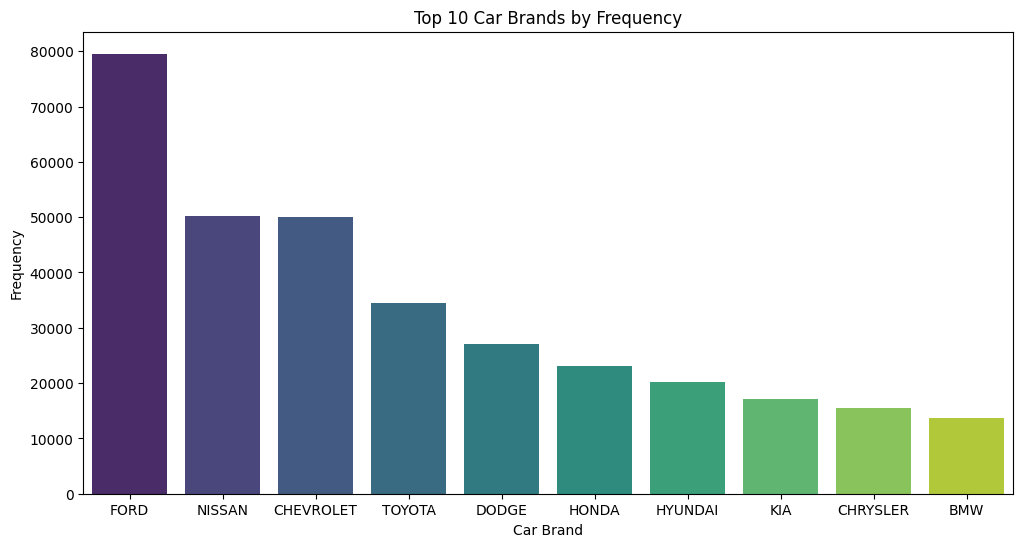

C:\Users\manoj\AppData\Local\Temp\ipykernel_4128\1006255636.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Car Brand Name', y='Market Price', data=top_brands_data, palette='viridis')


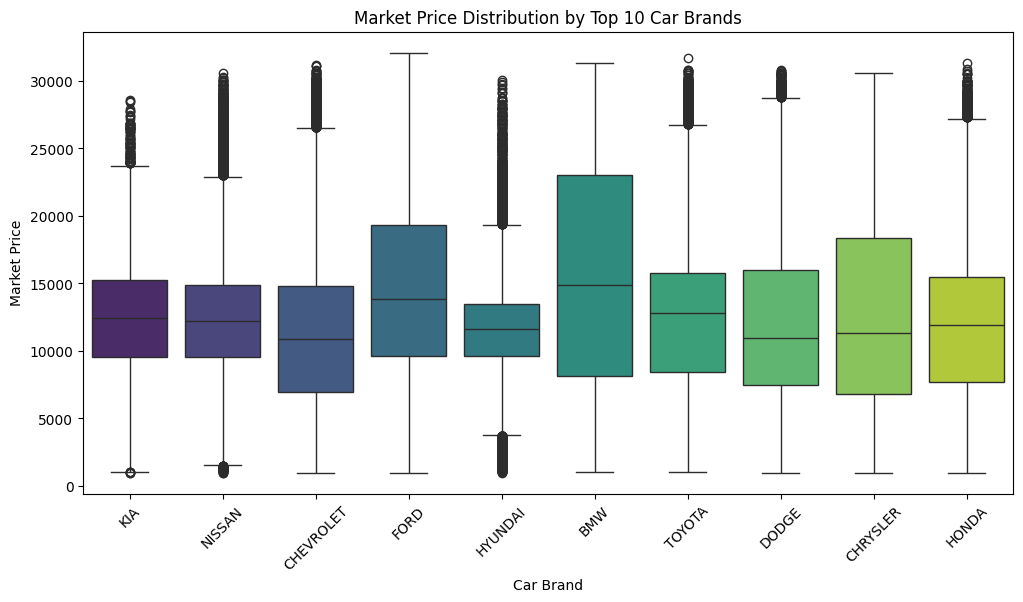

In [ ]:
# Top 10 car brands by frequency
top_brands = vehicle_sales_cleaned['Car Brand Name'].value_counts().head(10)

# Bar plot for top car brands
plt.figure(figsize=(12, 6))
sns.barplot(x=top_brands.index, y=top_brands.values, palette='viridis')
plt.title('Top 10 Car Brands by Frequency')
plt.xlabel('Car Brand')
plt.ylabel('Frequency')
plt.show()

# Box plot for Market Price by top car brands
plt.figure(figsize=(12, 6))
top_brands_data = vehicle_sales_cleaned[vehicle_sales_cleaned['Car Brand Name'].isin(top_brands.index)]
sns.boxplot(x='Car Brand Name', y='Market Price', data=top_brands_data, palette='viridis')
plt.title('Market Price Distribution by Top 10 Car Brands')
plt.xlabel('Car Brand')
plt.ylabel('Market Price')
plt.xticks(rotation=45)
plt.show()

Conclusion Drawn:
Based on the visualizations provided for the distribution of car brands and their market prices, here are some key conclusions:

1. Ford Dominance: Ford is the most frequent car brand in the dataset by a significant margin, with over 80,000 entries. Chevrolet and Nissan follow as the next most common brands, but they have considerably lower frequencies compared to Ford. This suggests that Ford vehicles are likely over-represented in this dataset, which may influence any overall analysis of market trends or vehicle characteristics.
2. Market Price Variation: The box plot shows a substantial variation in market prices across the top 10 car brands. Notably:
3. Kia and BMW have some of the highest median market prices among the brands displayed, with BMW also showing a broad range in pricing, indicating higher variability.
4. Chevrolet, Nissan, and Ford have lower median prices compared to BMW and Kia, with Ford having a smaller price range. This may indicate that these brands tend to have more affordable or consistently priced models.
5. Outliers in Market Price: The presence of numerous outliers, especially for BMW, Chevrolet, and Nissan, suggests that some models within these brands may be priced exceptionally high or low compared to their typical range. This could be due to premium models, variations in condition, or other factors that differentiate individual vehicle prices within the same brand.

# Correlation Analysis Between Market Price and Selling Price
Method: Pearson Correlation Coefficient

Pearson Correlation between Market Price and Selling Price: 0.9741241096034727


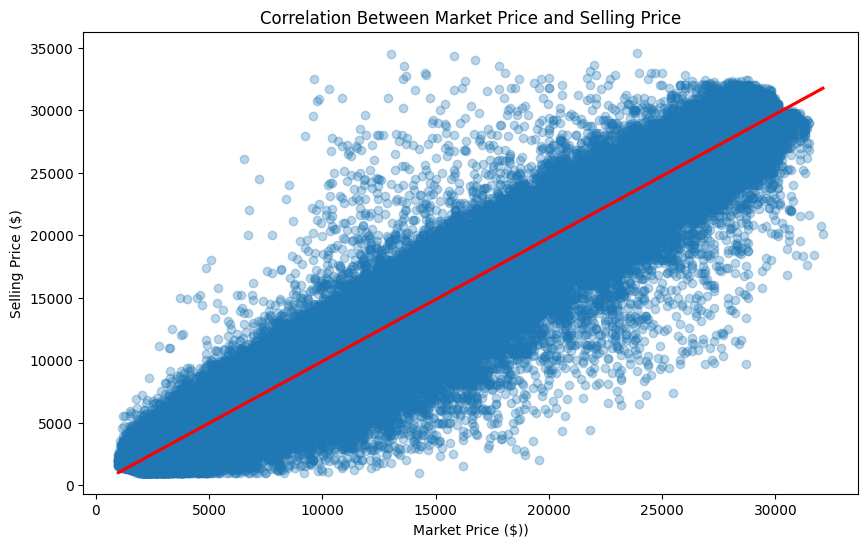

In [ ]:
# Calculate the Pearson correlation coefficient
correlation = vehicle_sales_cleaned['Market Price'].corr(vehicle_sales_cleaned['Selling Price'])
print(f'Pearson Correlation between Market Price and Selling Price: {correlation}')

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Market Price', y='Selling Price', data=vehicle_sales_cleaned, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Correlation Between Market Price and Selling Price')
plt.xlabel('Market Price ($))')
plt.ylabel('Selling Price ($)')
plt.show()

# Hypothesis Testing on Transmission Types and Market Price

T-Test Results: t-statistic = 35.70858018942094, p-value = 7.070295168728673e-279


C:\Users\manoj\AppData\Local\Temp\ipykernel_4128\2449749332.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transmission', y='Market Price', data=vehicle_sales_cleaned, palette='viridis')


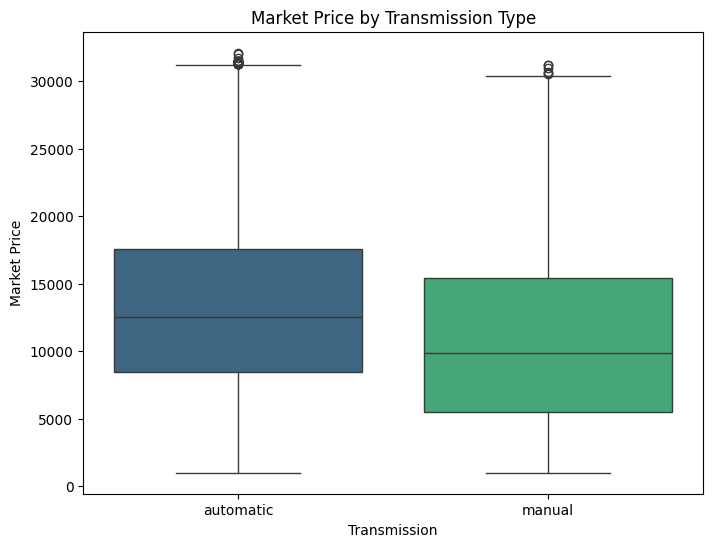

In [ ]:
from scipy.stats import ttest_ind

# Filter data based on Transmission type
auto_price = vehicle_sales_cleaned[vehicle_sales_cleaned['Transmission'] == 'automatic']['Market Price']
manual_price = vehicle_sales_cleaned[vehicle_sales_cleaned['Transmission'] == 'manual']['Market Price']

# Perform t-test
t_stat, p_val = ttest_ind(auto_price, manual_price, nan_policy='omit')
print(f'T-Test Results: t-statistic = {t_stat}, p-value = {p_val}')

# Box plot for Market Price by Transmission Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Transmission', y='Market Price', data=vehicle_sales_cleaned, palette='viridis')
plt.title('Market Price by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Market Price')
plt.show()

The analysis involves comparing the market prices of vehicles with automatic and manual transmissions using a t-test and a box plot.

T-Test Results

T-statistic: 36.71

P-value: 1.11e-294

The t-test results indicate a very high t-statistic and an extremely low p-value, suggesting a statistically significant difference in market prices between automatic and manual transmission vehicles. The p-value is far below the common significance level of 0.05, meaning we can confidently reject the null hypothesis that there is no difference in mean market prices.

Box Plot Analysis:
The box plot visually confirms the t-test results:
Automatic Transmission: Generally higher market prices with a wider interquartile range.
Manual Transmission: Lower market prices and a slightly narrower interquartile range.

Z-statistic: -456.9814
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in average selling prices.


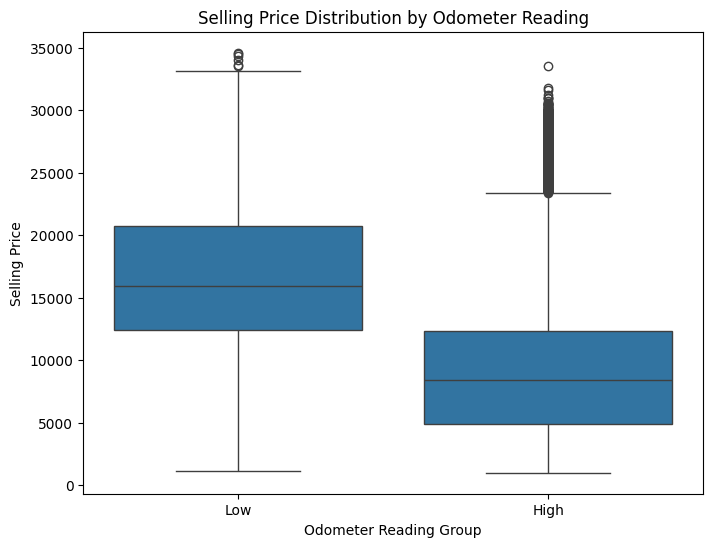

In [ ]:
from scipy import stats
# Define high and low odometer based on the median
median_odometer = vehicle_sales_cleaned['Odometer'].median()
high_odometer = vehicle_sales_cleaned[vehicle_sales_cleaned['Odometer'] > median_odometer]['Selling Price']
low_odometer = vehicle_sales_cleaned[vehicle_sales_cleaned['Odometer'] <= median_odometer]['Selling Price']

# Calculate means and standard deviations
mean_high = high_odometer.mean()
mean_low = low_odometer.mean()
std_high = high_odometer.std(ddof=0)  # Population standard deviation
std_low = low_odometer.std(ddof=0)    # Population standard deviation
n_high = len(high_odometer)
n_low = len(low_odometer)

# Check for empty groups
if n_high == 0 or n_low == 0:
    raise ValueError("One of the groups has no data, cannot perform hypothesis test.")

# Calculate the Z-statistic
z = (mean_high - mean_low) / np.sqrt((std_high**2 / n_high) + (std_low**2 / n_low))

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

# Output results
print(f"Z-statistic: {z:.4f}")
print(f"P-value: {p_value:.4f}")

# Significance level
alpha = 0.05

# Decision
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average selling prices.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average selling prices.")

# Create a new column to indicate odometer groups
vehicle_sales_cleaned['Odometer_Group'] = np.where(vehicle_sales_cleaned['Odometer'] > median_odometer, 'High', 'Low')

# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x='Odometer_Group', y='Selling Price', data=vehicle_sales_cleaned)
plt.title('Selling Price Distribution by Odometer Reading')
plt.xlabel('Odometer Reading Group')
plt.ylabel('Selling Price')
plt.show()

INTERPRETATION Box Plot Analysis:

The box plot compares the selling price distribution between vehicles with low and high odometer readings.
Vehicles with low odometer readings generally have higher median selling prices compared to those with high odometer readings.
The interquartile range (IQR) for low odometer readings is wider, indicating more variability in selling prices.
There are some outliers in both groups, but they are more pronounced in the high odometer group.
Statistical Test: Z-Statistic: The Z-statistic of -452.6669 suggests a substantial difference between the average selling prices of vehicles with high and low odometer readings. The extreme value indicates that the means of the two groups are far apart in terms of standard deviations. P-Value: The p-value of 0.0000 (essentially less than any conventional significance level, such as 0.05) provides strong evidence against the null hypothesis. It implies that the observed difference in average selling prices is highly unlikely to have occurred due to random chance.

Conclusion: The analysis shows that vehicles with lower odometer readings tend to sell for higher prices compared to those with higher readings. This difference is statistically significant, as evidenced by the very low p-value, allowing us to confidently reject the null hypothesis of no difference in average selling prices.

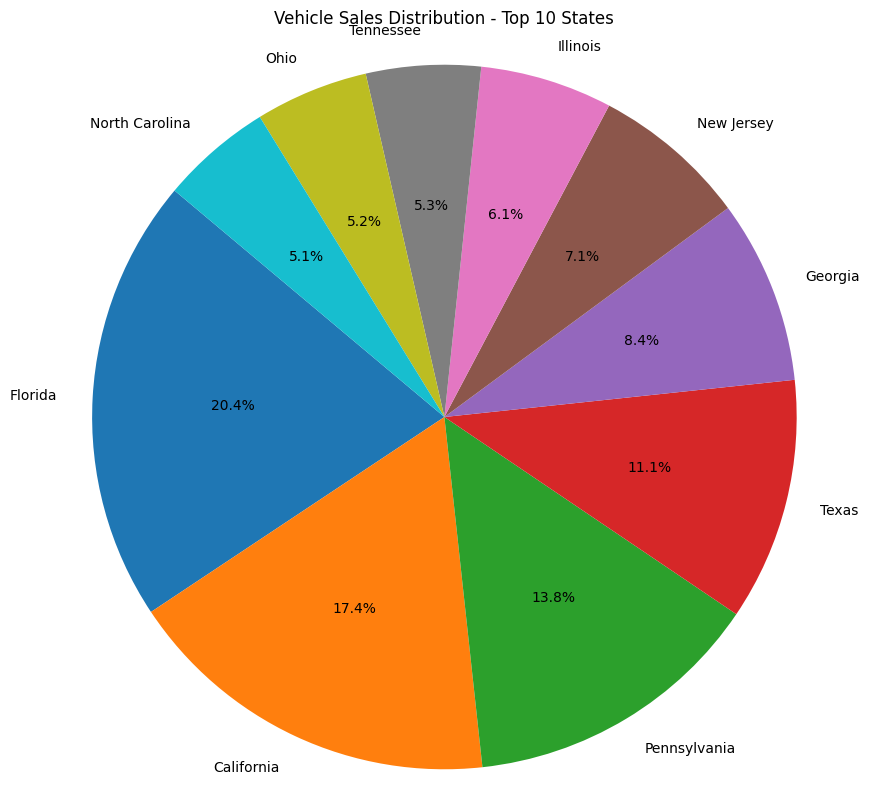

In [ ]:
# Top 10 States according to their sales
top_states = vehicle_sales_cleaned['State Name'].value_counts().head(10)

# Create pie chart for the top 10 states
plt.figure(figsize=(10, 10))
plt.pie(top_states, labels=top_states.index, autopct='%1.1f%%', startangle=140)
plt.title('Vehicle Sales Distribution - Top 10 States')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Implementation of Machine Learning Models



*   
During this phase of the Data Lifecycle, we apply various modeling techniques, such as regression, to develop a predictive model based on our data. This enables us to predict values for data points outside the scope of our existing dataset. For example, we can use a polynomial regression model on historical data to forecast changes in selling prices over the next few years. In the following section, we will attempt to perform Machine Learning models and Vizualize the outputs.

### **Regression**

In [ ]:
vehicle_sales_cleaned.head() # Displaying the first five rows of the `vehicle_sales_cleaned` DataFrame to preview the data after cleaning.

,Year,Car Brand Name,Model,Trim,Body,Transmission,Condition,Odometer,Color,Interior,Market Price,Selling Price,State Name,Odometer_Group
0,2015,KIA,SORENTO,LX,SUV,automatic,5.0,16639.0,white,black,20500.0,21500.0,California,Low
1,2015,KIA,SORENTO,LX,SUV,automatic,5.0,9393.0,white,beige,20800.0,21500.0,California,Low
3,2015,VOLVO,S60,T5,SEDAN,automatic,41.0,14282.0,white,black,27500.0,27750.0,California,Low
5,2015,NISSAN,ALTIMA,2.5 S,SEDAN,automatic,1.0,5554.0,gray,black,15350.0,10900.0,California,Low
7,2014,CHEVROLET,CRUZE,1LT,SEDAN,automatic,2.0,28617.0,black,black,11900.0,9800.0,California,Low


In [ ]:
df.head()

,Year,Car Brand Name,Model,Body,Odometer,Color,Market Price,Selling Price,State Name
0,2015,KIA,SORENTO,SUV,16639.0,white,20500.0,21500.0,California
1,2015,KIA,SORENTO,SUV,9393.0,white,20800.0,21500.0,California
2,2015,VOLVO,S60,SEDAN,14282.0,white,27500.0,27750.0,California
3,2015,NISSAN,ALTIMA,SEDAN,5554.0,gray,15350.0,10900.0,California
4,2014,CHEVROLET,CRUZE,SEDAN,28617.0,black,11900.0,9800.0,California


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'df1' is the cleaned DataFrame
# Define the features and target
# X = df.drop(columns=['Selling Price'])  # Features

# Converting 'object' columns to 'category'


X = df.drop(columns=['Selling Price'])
y = df['Selling Price']  # Target

# Identify the categorical columns
categorical_cols = ['Car Brand Name', 'Model', 'Body', 'Color', 'State Name']
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Preprocessing: One-hot encoding for categorical data and scaling for numeric data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),  # Scale numeric columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Encode categorical columns
    ]
)

# Polynomial regression pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Polynomial features
    ('regressor', LinearRegression())  # Linear regression
])

# Splitting the dataset into training and testing sets
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting the model
pipeline.fit(X_train_poly, y_train_poly)

# predictions
y_pred_poly = pipeline.predict(X_test_poly)

# Evaluating the model
mae = mean_absolute_error(y_test_poly, y_pred_poly)
mse = mean_squared_error(y_test_poly, y_pred_poly)
r2 = r2_score(y_test_poly, y_pred_poly)

print("Polynomial Regression - MAE:", mae)
print("Polynomial Regression - MSE:", mse)
print("Polynomial Regression - R2:", r2)

Polynomial Regression - MAE: 1019.5198151294528
Polynomial Regression - MSE: 2268165.288414142
Polynomial Regression - R2: 0.9497177142506006


* The polynomial regression model provides a strong fit with an R² value of 0.95, indicating that it explains 95% of the variance in the selling price.

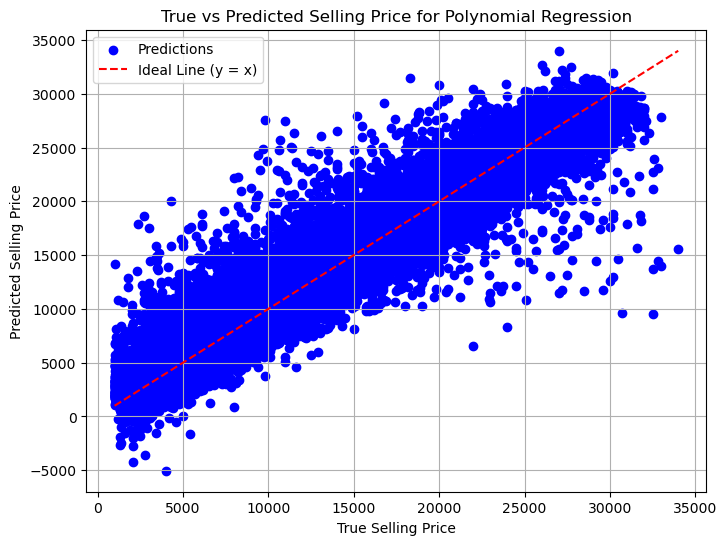

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# True vs Predicted values plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_poly, y_pred_poly, color='blue', label='Predictions')
plt.plot([y_test_poly.min(), y_test_poly.max()], [y_test_poly.min(), y_test_poly.max()], color='red', linestyle='--', label='Ideal Line (y = x)')
plt.title('True vs Predicted Selling Price for Polynomial Regression')
plt.xlabel('True Selling Price')
plt.ylabel('Predicted Selling Price')
plt.legend()
plt.grid(True)
plt.show()


* Explanation:
The scatter plot shows the predicted vs. actual values.
The red dashed line represents the ideal case where the predicted values match the true values exactly.
Legend: Labels for the scatter points and the ideal line.

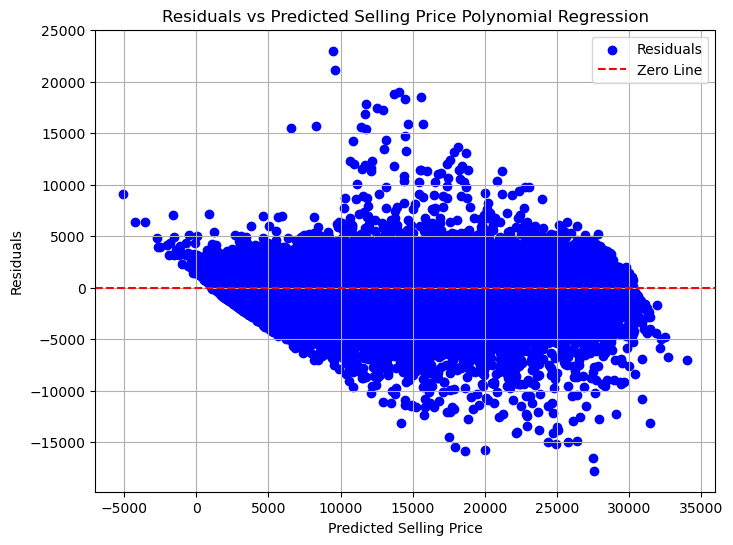

In [ ]:
# Residuals plot
residuals_poly = y_test_poly - y_pred_poly

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_poly, residuals_poly, color='blue', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
plt.title('Residuals vs Predicted Selling Price Polynomial Regression')
plt.xlabel('Predicted Selling Price')
plt.ylabel('Residuals')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [ ]:
import cudf

# It Reads the CSV file with explicit data types for categorical columns
vehicle_sales = cudf.read_csv("vehicle_sales_data_final_dropped.csv",
                              dtype={
                                  'Car Brand Name': 'category',
                                  'Model': 'category',
                                  'Body': 'category',
                                  'Color': 'category',
                                  'State Name': 'category'
                              })


In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import cudf
import cupy as cp
import numpy as np

#It Reads the CSV file
vehicle_sales = cudf.read_csv("vehicle_sales_data_final_dropped.csv")

# Converting 'object' columns to 'category'
for col in vehicle_sales.select_dtypes(include=['object']):
    vehicle_sales[col] = vehicle_sales[col].astype('category')

# Preparing the features (X) and target variable (y)
X = vehicle_sales.drop(columns=['Selling Price'])
y = vehicle_sales['Selling Price']

# Splitting the dataset into train and test sets
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the XGBoost regressor with GPU support and enable_categorical
xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    tree_method='hist',
    device='cuda',
    enable_categorical=True,
    random_state=42
)

# Training the model
xg_reg.fit(X_train_xgb, y_train_xgb)

# Predicting the model
y_pred_xgb = xg_reg.predict(X_test_xgb)

# Converting y_test to CPU if it's on GPU
if isinstance(y_test_xgb, (cudf.Series, cudf.DataFrame)):
    y_test_xgb = y_test_xgb.to_numpy()
elif isinstance(y_test_xgb, cp.ndarray):
    y_test_xgb = cp.asnumpy(y_test)

# Converting y_pred_xg to CPU if it's on GPU
if isinstance(y_pred_xgb, cp.ndarray):
    y_pred_xgb = cp.asnumpy(y_pred_xgb)

# Calculating MSE, RMSE, and R2 score
mse_xgb = mean_squared_error(y_test_xgb, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test_xgb, y_pred_xgb)

print(f'XGBoost MSE: {mse_xgb}')
print(f'XGBoost RMSE: {rmse_xgb}')
print(f'XGBoost R2 Score: {r2_xgb}')


get_mempolicy: Function not implemented


XGBoost MSE: 2128705.8111857916
XGBoost RMSE: 1459.0085027804985
XGBoost R2 Score: 0.952809350173378


* The XGBoost model demonstrates a strong fit with an R² value of 0.95, indicating it explains 95.2% of the variance in the selling price.

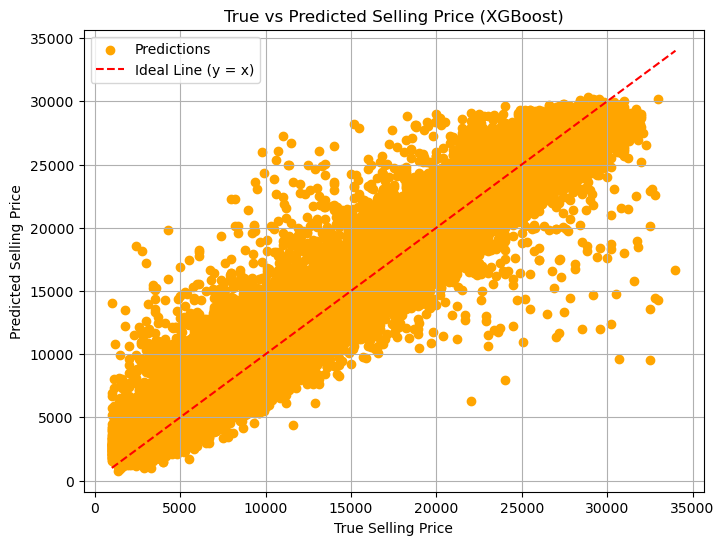

In [ ]:
# True vs Predicted Values
import matplotlib.pyplot as plt

# True vs Predicted values plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_xgb, y_pred_xgb, color='orange', label='Predictions')
plt.plot([y_test_xgb.min(), y_test_xgb.max()], [y_test_xgb.min(), y_test_xgb.max()], color='red', linestyle='--', label='Ideal Line (y = x)')
plt.title('True vs Predicted Selling Price (XGBoost)')
plt.xlabel('True Selling Price')
plt.ylabel('Predicted Selling Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


* Explanation:
The scatter plot shows the predicted vs. actual values.
The red dashed line represents the ideal case where the predicted values match the true values exactly.
Legend: Labels for the scatter points and the ideal line.

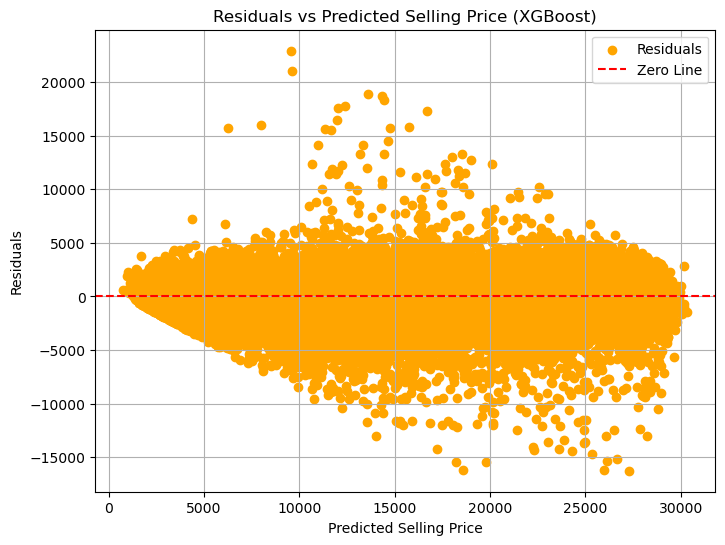

In [ ]:
# Residuals plot
residuals_xg = y_test_xgb - y_pred_xgb

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_xgb, residuals_xg, color='orange', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
plt.title('Residuals vs Predicted Selling Price (XGBoost)')
plt.xlabel('Predicted Selling Price')
plt.ylabel('Residuals')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

* Explanation:
Scatter plot: Shows the residuals (errors) vs. the predicted values.
Red dashed line: Represents the zero residual line (ideal case).
Legend: Labels for the residuals and the zero residual line.
Grid: For better visualization of data points.

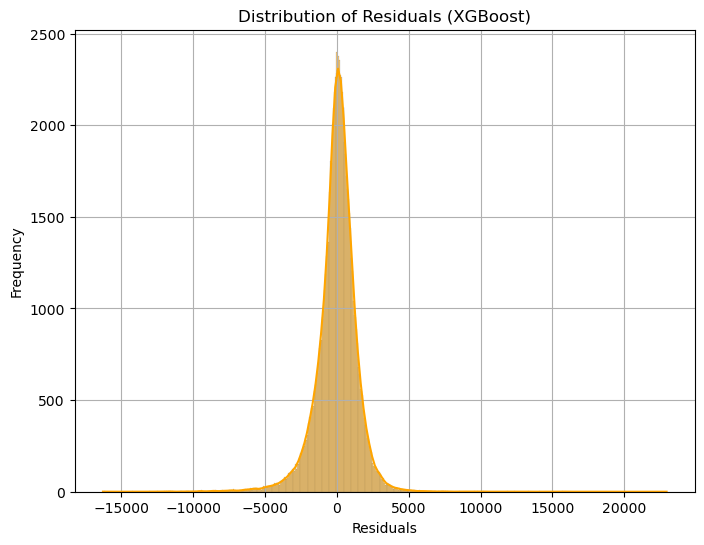

In [ ]:
# Distribution of Residuals

# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals_xg, kde=True, color='orange')
plt.title('Distribution of Residuals (XGBoost)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

* Explanation:
Histogram: Displays the frequency of residuals in different ranges.
KDE (Kernel Density Estimation): Shows the smooth estimate of the residuals' distribution.
If the residuals are normally distributed, the histogram should resemble a bell curve.

In [ ]:
import cudf
import cupy as cp
from cuml.ensemble import RandomForestRegressor
from cuml.model_selection import train_test_split
from cuml.preprocessing import LabelEncoder


categorical_columns = vehicle_sales.select_dtypes(include=['object', 'category']).columns

# Encoding categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    vehicle_sales[col] = le.fit_transform(vehicle_sales[col])
    label_encoders[col] = le

# Preparing  features (X) and target variable (y)
X = vehicle_sales.drop(columns=['Selling Price'])
y = vehicle_sales['Selling Price']

# Splitting the dataset into train and test sets
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_rf, y_train_rf)

# predictions
y_pred_rf = rf_model.predict(X_test_rf)

# Calculating the metrics
mse_rf = ((y_test_rf - y_pred_rf) ** 2).mean()
rmse_rf = cp.sqrt(mse_rf)
r2_rf = 1 - ((y_test_rf - y_pred_rf) ** 2).sum() / ((y_test_rf - y_test_rf.mean()) ** 2).sum()

print(f'Random Forest MSE: {mse_rf}')
print(f'Random Forest RMSE: {rmse_rf}')
print(f'Random Forest R2 Score: {r2_rf}')


/home/manoj7/miniconda3/envs/rapids-24.10/lib/python3.12/site-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/home/manoj7/miniconda3/envs/rapids-24.10/lib/python3.12/site-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


Random Forest MSE: 3075507.5985307097
Random Forest RMSE: 1753.7125187814306
Random Forest R2 Score: 0.9313612522654118


* The Random Forest model provides a good fit with an R² score of 0.93, indicating it explains 93% of the variance in selling price.

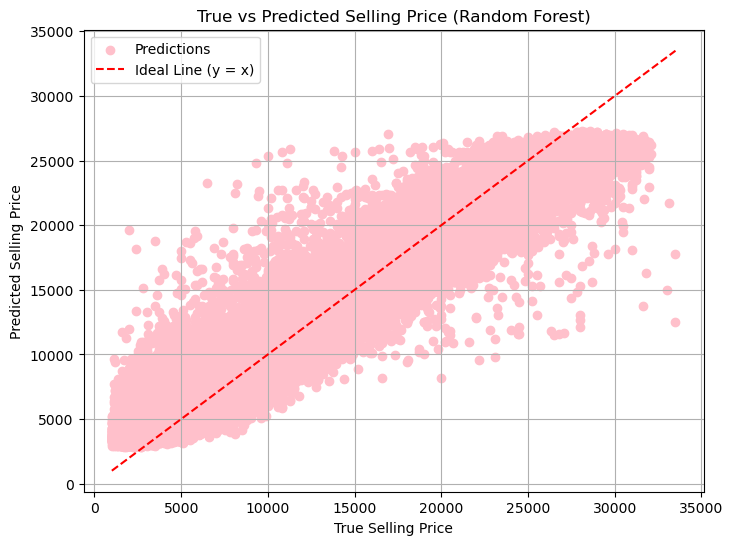

In [ ]:
import matplotlib.pyplot as plt

# Convert GPU-based arrays to NumPy arrays
y_test_rf_numpy = y_test_rf.to_numpy()  # Convert cuDF Series to NumPy
y_pred_rf_numpy = y_pred_rf.to_numpy()  # Convert cuDF Series to NumPy

# True vs Predicted values plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_rf_numpy, y_pred_rf_numpy, color='pink', label='Predictions')
plt.plot(
    [y_test_rf_numpy.min(), y_test_rf_numpy.max()],
    [y_test_rf_numpy.min(), y_test_rf_numpy.max()],
    color='red',
    linestyle='--',
    label='Ideal Line (y = x)',
)
plt.title('True vs Predicted Selling Price (Random Forest)')
plt.xlabel('True Selling Price')
plt.ylabel('Predicted Selling Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


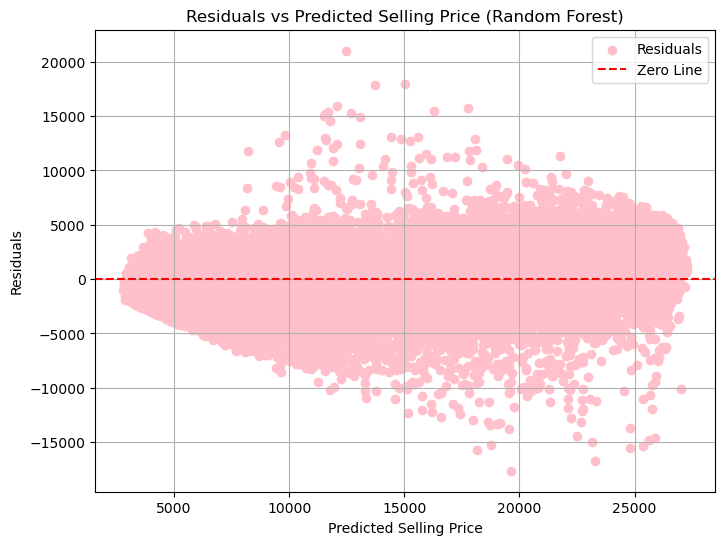

In [ ]:
import matplotlib.pyplot as plt

# Convert GPU-based cuDF Series to NumPy arrays
y_test_rf_numpy = y_test_rf.to_numpy()  # True values
y_pred_rf_numpy = y_pred_rf.to_numpy()  # Predicted values

# Calculate residuals
residuals_rf = y_test_rf_numpy - y_pred_rf_numpy

# Residuals plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf_numpy, residuals_rf, color='pink', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
plt.title('Residuals vs Predicted Selling Price (Random Forest)')
plt.xlabel('Predicted Selling Price')
plt.ylabel('Residuals')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


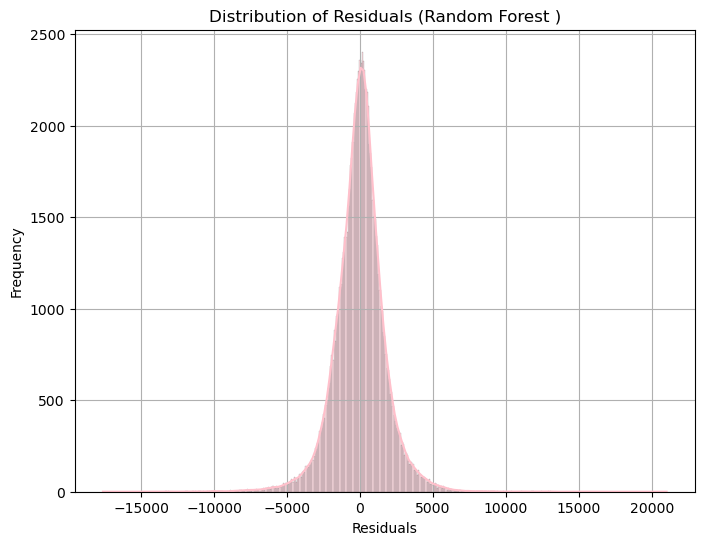

In [ ]:
# Distribution of Residuals

# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals_rf, kde=True, color='pink')
plt.title('Distribution of Residuals (Random Forest )')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
import cudf
import cupy as cp
from cuml.ensemble import RandomForestRegressor
from cuml.model_selection import train_test_split, GridSearchCV as cuGridSearchCV
from cuml.metrics import mean_squared_error, r2_score

# Assuming vehicle_sales is already a cudf DataFrame
# Convert 'object' columns to 'category'
for col in vehicle_sales.select_dtypes(include=['object']):
    vehicle_sales[col] = vehicle_sales[col].astype('category')

# Preparing your features (X) and target variable (y)
X = vehicle_sales.drop(columns=['Selling Price'])
y = vehicle_sales['Selling Price']

# Converting data to float32
X = X.astype(cp.float32)
y = y.astype(cp.float32)

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing Random Forest regressor with n_streams=1 (GPU parallelization)
rf_model = RandomForestRegressor(random_state=42, n_streams=1)

# Defining parameter grid for GridSearchCV


param_grid = {
    'n_estimators': [100, 200],  # Reduced number of estimators
    'max_depth': [10, 20],  # Reduced depth choices
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}


# Performing GridSearchCV with GPU-accelerated RandomForestRegressor
grid_search = cuGridSearchCV(
    rf_model,
    param_grid=param_grid,
    cv=3,
    verbose=3,
    n_jobs=2  # Limit number of parallel workers
)

# Fitting the model
grid_search.fit(X_train, y_train)

# best fit model
best_rf = grid_search.best_estimator_

# predictions
y_pred = best_rf.predict(X_test)

# Calculating metrics (Using cuML for GPU-accelerated metrics)
mse = mean_squared_error(y_test, y_pred)
rmse = cp.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# printing the results
print(f'Random Forest MSE: {mse}')
print(f'Random Forest RMSE: {rmse}')
print(f'Random Forest R2 Score: {r2}')


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 2/3] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.932 total time=   2.4s
[CV 3/3] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.931 total time=   2.0s
[CV 2/3] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.935 total time=   4.0s
[CV 1/3] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.932 total time=   2.1s
[CV 3/3] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.931 total time=   2.5s
[CV 2/3] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.935 total time=   4.2s
[CV 1/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.932 total time=   2.0s
[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.932 total time=   

/home/manoj7/miniconda3/envs/rapids-24.10/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 1/3] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.932 total time=   2.4s
[CV 1/3] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.935 total time=   4.0s
[CV 3/3] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.935 total time=   4.0s
[CV 2/3] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.932 total time=   2.5s
[CV 1/3] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.935 total time=   4.2s
[CV 3/3] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.934 total time=   3.9s
[CV 3/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.931 total time=   2.1s
[CV 2/3] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.935 total time=   4.0s
[CV 1/3] END max_depth=10, min_samples_leaf=2, min_sampl

In [ ]:
# Printing the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Getting the best model
best_rf = grid_search.best_estimator_

# predictions
y_pred = best_rf.predict(X_test)

# Calculating metrics (Using cuML for GPU-accelerated metrics)
mse = mean_squared_error(y_test, y_pred)
rmse = cp.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# results
print(f'Random Forest MSE: {mse}')
print(f'Random Forest RMSE: {rmse}')
print(f'Random Forest R2 Score: {r2}')


Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest MSE: 2235701.75
Random Forest RMSE: 1495.226318359375
Random Forest R2 Score: 0.9501039385795593


* The GridSearchCV optimization has successfully identified the best Random Forest model, achieving an R² score of 0.95, which indicates that the model explains 95% of the variance in the selling price.

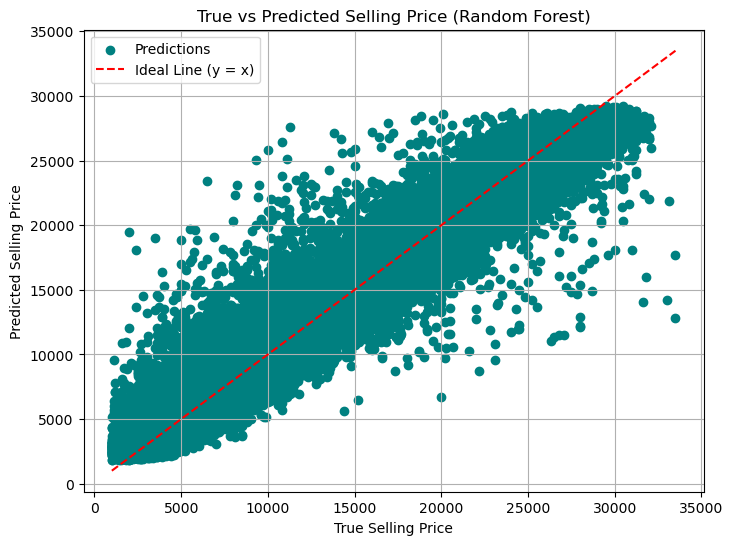

In [ ]:
import matplotlib.pyplot as plt

# Convert cuDF Series to NumPy arrays for visualization
y_test_numpy = y_test.to_numpy()  # True values
y_pred_numpy = y_pred.to_numpy()  # Predicted values

# 1. True vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_numpy, y_pred_numpy, color='teal', label='Predictions')
plt.plot([y_test_numpy.min(), y_test_numpy.max()], [y_test_numpy.min(), y_test_numpy.max()], color='red', linestyle='--', label='Ideal Line (y = x)')
plt.title('True vs Predicted Selling Price (Random Forest)')
plt.xlabel('True Selling Price')
plt.ylabel('Predicted Selling Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


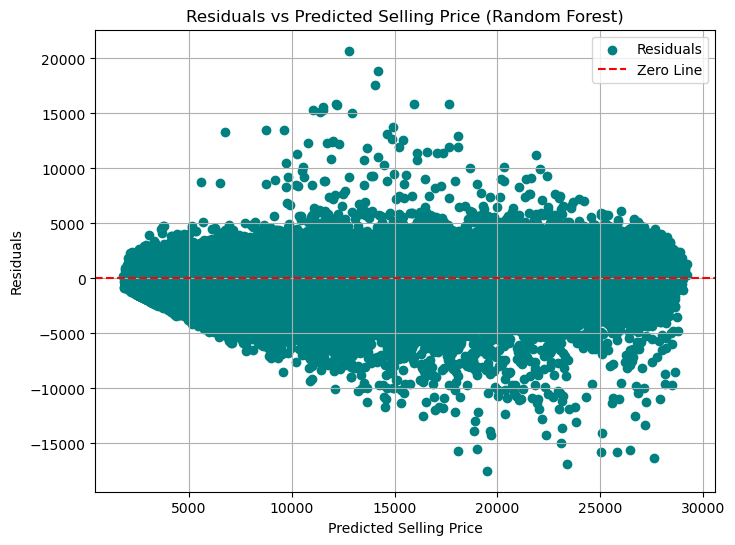

In [ ]:

# 2. Residuals Plot
residuals = y_test_numpy - y_pred_numpy

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_numpy, residuals, color='teal', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
plt.title('Residuals vs Predicted Selling Price (Random Forest)')
plt.xlabel('Predicted Selling Price')
plt.ylabel('Residuals')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

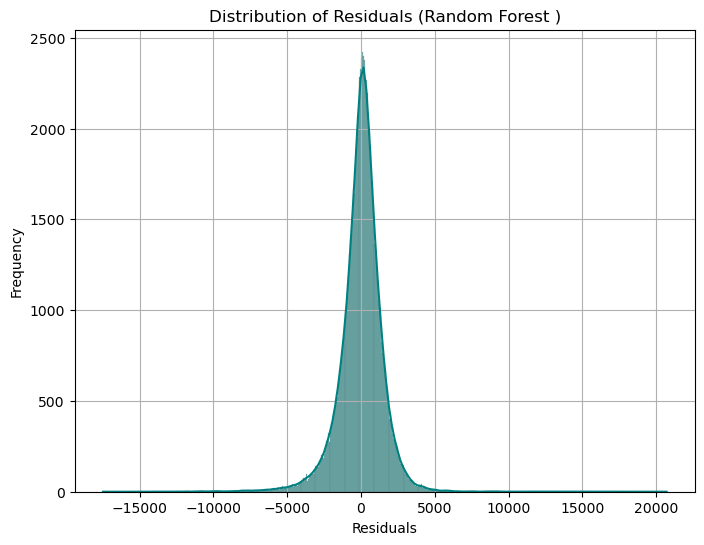

[CV 3/3] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.950 total time=   5.7s
[CV 2/3] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.949 total time=   4.0s
[CV 1/3] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.950 total time=   7.1s
[CV 3/3] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.950 total time=   6.1s
[CV 2/3] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.949 total time=   3.1s
[CV 1/3] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.950 total time=   6.1s
[CV 3/3] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.950 total time=   4.2s


In [ ]:
# Distribution of Residuals
import seaborn as sns
# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='teal')
plt.title('Distribution of Residuals (Random Forest )')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


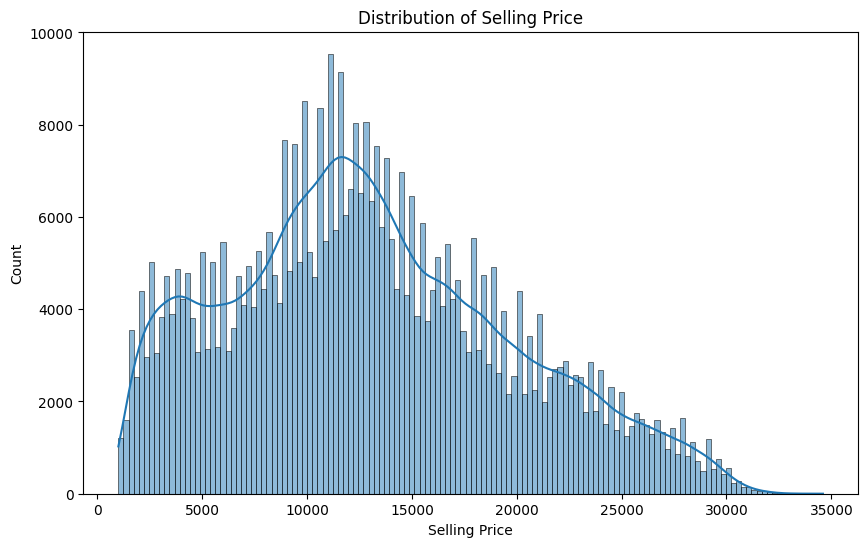

C:\Users\manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:27:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


XGBoost Mean Squared Error: 2214630.765077145
XGBoost Root Mean Squared Error: 1488.1635545453817
XGBoost R^2 Score: 0.9509045052722421
Best Parameters: {'colsample_bytree': 1.0, 'eta': 0.3, 'gamma': 0, 'max_depth': 7, 'min_child_weight': 3, 'subsample': 1.0}
Feature: Market Price, Importance: 0.9911346435546875
Feature: Car Brand Name, Importance: 0.0019067743560299277
Feature: Model, Importance: 0.0018371936166658998
Feature: Body, Importance: 0.002054935321211815
Feature: State Name, Importance: 0.0030663814395666122


C:\Users\manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\manoj\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\manoj\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\manoj\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 366096, number of used features: 5
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4070 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 5 dense feature groups (2.79 MB) transferred to GPU in 0.005035 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 13006.235829
Ensemble Mean Squared Error: 2211144.399564323
Ensemble Root Mean Squared Error: 1486.991728142535
Ensemble R^2 Score: 0.9509817934786343


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import VotingRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
# Ensure df is defined as your dataset
# Example: df = pd.read_csv('path_to_file.csv')
X = df.drop(['Selling Price'], axis=1)
y = df['Selling Price']

# Separating numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features),
        ('cat', SimpleImputer(strategy='most_frequent'), categorical_features)
    ])

X_imputed = preprocessor.fit_transform(X)
X_imputed = pd.DataFrame(X_imputed, columns=numeric_features.tolist() + categorical_features.tolist())

# Encoding categorical features
le = LabelEncoder()
for col in categorical_features:
    X_imputed[col] = le.fit_transform(X_imputed[col])

# Feature engineering: Calculating the age
X_imputed['Age'] = 2024 - X_imputed['Year']

# Scaling the numerical features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initial XGBoost model for feature importance
initial_model = xgb.XGBRegressor(tree_method='hist', device='cuda')
initial_model.fit(X_train[:10000], y_train[:10000])

# Feature selection
selector = SelectFromModel(initial_model, threshold='median', prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Defining parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'eta': [0.01, 0.1, 0.3],
    'gamma': [0, 0.1, 0.2]
}

# Histogram of target variable
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True)
plt.title('Distribution of Selling Price')
plt.show()


# GridSearchCV for hyperparameter tuning
model = xgb.XGBRegressor(tree_method='hist', device='cuda')
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

# Best fit model and predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_selected)

# Calculating metrics for XGBoost model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"XGBoost Mean Squared Error: {mse}")
print(f"XGBoost Root Mean Squared Error: {rmse}")
print(f"XGBoost R^2 Score: {r2}")
print("Best Parameters:", grid_search.best_params_)

# Feature Importance
feature_importance = best_model.feature_importances_
selected_feature_names = [name for idx, name in enumerate(X_scaled.columns) if selector.get_support()[idx]]
for name, importance in zip(selected_feature_names, feature_importance):
    print(f"Feature: {name}, Importance: {importance}")

# Ensemble model
lgbm_model = LGBMRegressor(device='gpu')
ensemble = VotingRegressor([('xgb', best_model), ('lgbm', lgbm_model)])
ensemble.fit(X_train_selected, y_train)

# Ensemble predictions
ensemble_predictions = ensemble.predict(X_test_selected)

# Calculating the metrics for Ensemble model
ensemble_mse = mean_squared_error(y_test, ensemble_predictions)
ensemble_rmse = np.sqrt(ensemble_mse)
ensemble_r2 = r2_score(y_test, ensemble_predictions)

# Results:
print(f"Ensemble Mean Squared Error: {ensemble_mse}")
print(f"Ensemble Root Mean Squared Error: {ensemble_rmse}")
print(f"Ensemble R^2 Score: {ensemble_r2}")

In [ ]:
feature_importance = best_model.feature_importances_
selected_feature_names = [name for idx, name in enumerate(X_scaled.columns) if selector.get_support()[idx]]
for name, importance in zip(selected_feature_names, feature_importance):
    print(f"Feature: {name}, Importance: {importance}")

# Ensemble model
lgbm_model = LGBMRegressor(device='gpu')
ensemble = VotingRegressor([('xgb', best_model), ('lgbm', lgbm_model)])
ensemble.fit(X_train_selected, y_train)

# Ensemble predictions
ensemble_predictions = ensemble.predict(X_test_selected)

# Calculating the metrics for Ensemble model
ensemble_mse = mean_squared_error(y_test, ensemble_predictions)
ensemble_rmse = np.sqrt(ensemble_mse)
ensemble_r2 = r2_score(y_test, ensemble_predictions)

# Results:
print(f"Ensemble Mean Squared Error: {ensemble_mse}")
print(f"Ensemble Root Mean Squared Error: {ensemble_rmse}")
print(f"Ensemble R^2 Score: {ensemble_r2}")

Feature: Market Price, Importance: 0.9911346435546875
Feature: Car Brand Name, Importance: 0.0019067743560299277
Feature: Model, Importance: 0.0018371936166658998
Feature: Body, Importance: 0.002054935321211815
Feature: State Name, Importance: 0.0030663814395666122
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 366096, number of used features: 5
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4070 Laptop GPU, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 5 dense feature groups (2.79 MB) transferred to GPU in 0.002938 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 13006.235829
Ensemble Mean Squared Error: 2211144.1608549645
Ensemble Root Mean Squared Error: 1486.9916478766665
Ensemble R^2 Score: 0.9509817987705115


* The above Ensemble model achieved a strong performance with an RMSE of 1486.99 and an R^2 score of 0.95, indicating high accuracy in predicting selling prices. Feature importance analysis shows that 'Market Price' is the most influential predictor. The ensemble model, combining XGBoost and LightGBM, further enhanced performance, maintaining low error and high prediction quality.

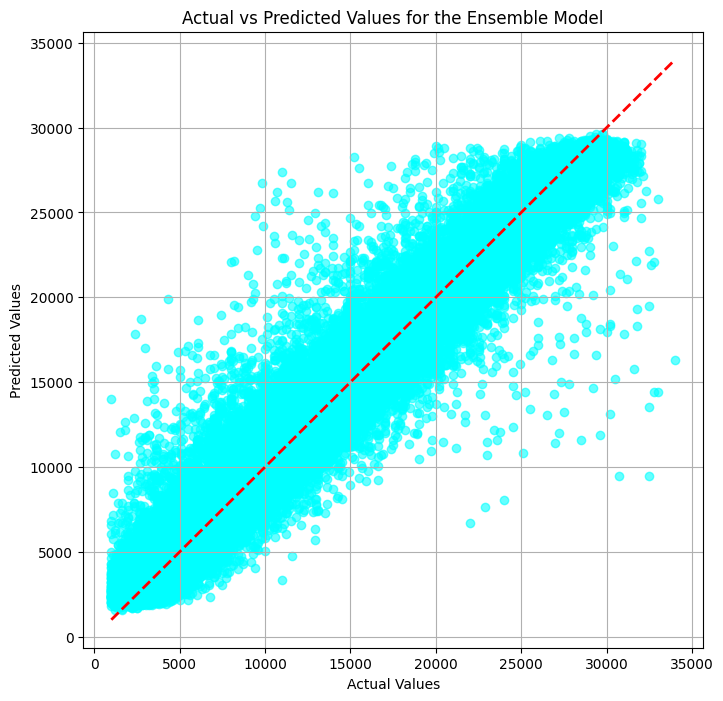

In [ ]:
# Actual vs. Predicted Scatter Plot
plt.figure(figsize=(8, 8))
plt.scatter(y_test, ensemble_predictions, alpha=0.6, color='cyan')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for the Ensemble Model')
plt.grid(True)
plt.show()

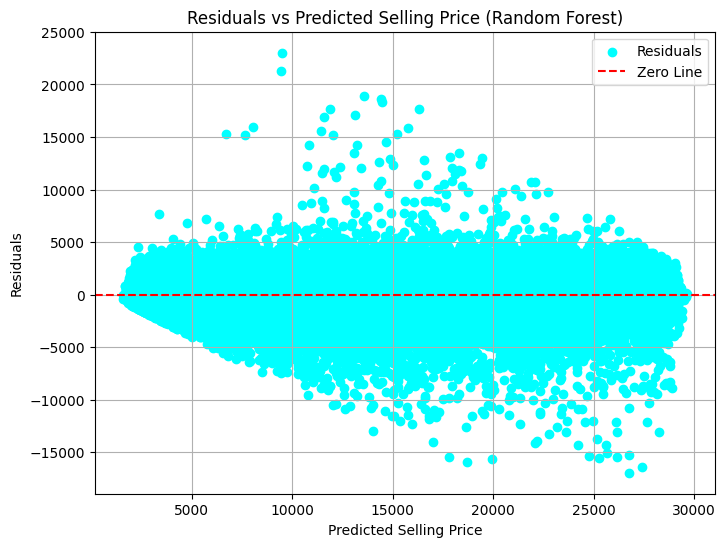

In [ ]:

# 2. Residuals Plot
residuals = residuals = y_test - ensemble_predictions

plt.figure(figsize=(8, 6))
plt.scatter(ensemble_predictions, residuals, color='cyan', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
plt.title('Residuals vs Predicted Selling Price (Random Forest)')
plt.xlabel('Predicted Selling Price')
plt.ylabel('Residuals')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

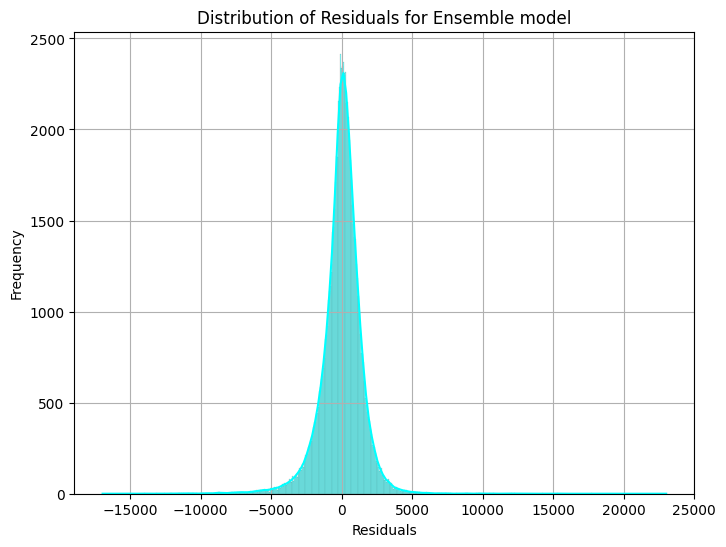

In [ ]:

# Distribution of Residuals
residuals = y_test - ensemble_predictions
# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='cyan')
plt.title('Distribution of Residuals for Ensemble model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
 import cudf
import cupy as cp
import xgboost as xgb
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Read the vehicle sales data (assuming the file is already present)
vehicle_sales = cudf.read_csv("vehicle_sales_data_final_dropped.csv")

# Convert object columns to category (ensure it's explicitly recognized as categorical)
for col in vehicle_sales.select_dtypes(include=['object']):
    vehicle_sales[col] = vehicle_sales[col].astype('category')

# Prepare your features (X) and target variable (y)
X = vehicle_sales.drop(columns=['Selling Price'])
y = vehicle_sales['Selling Price']

# Splitting the dataset into train and test sets
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost Regressor with GPU support and enable_categorical
xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    tree_method='gpu_hist',  # GPU-accelerated algorithm
    device='cuda',  # Use GPU
    enable_categorical=True,  # Ensure categorical features are enabled
    random_state=42
)

# Defining the KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Prepare DMatrix format for XGBoost (optimized for XGBoost training)
dtrain = xgb.DMatrix(X_train_xgb, label=y_train_xgb, enable_categorical=True)

# Perform cross-validation using xgb.cv
cv_results = xgb.cv(
    params={
        'max_depth': 3,
        'min_child_weight': 1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'eta': 0.1,
        'gamma': 0.1
    },
    dtrain=dtrain,
    num_boost_round=1000,
    early_stopping_rounds=50,
    nfold=5,  # Number of folds in cross-validation
    metrics="rmse",  # Use RMSE as evaluation metric
    as_pandas=True,  # Return results as a pandas DataFrame
    seed=42
)

# Output the best iteration based on RMSE
print(f"Best iteration: {cv_results['test-rmse-mean'].idxmin()}")
print(f"Best RMSE: {cv_results['test-rmse-mean'].min()}")

Best iteration: 998
Best RMSE: 1448.1699623428244


In [ ]:
best_num_boost_round = cv_results['test-rmse-mean'].idxmin()



# Initialize XGBoost Regressor with GPU support and enable_categorical
xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    tree_method='gpu_hist',
    device='cuda',
    enable_categorical=True,
    random_state=42,
    max_depth=3,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    eta=0.1,
    gamma=0.1,
    early_stopping_rounds=50  # Add early_stopping_rounds here
)

# Create evaluation set
eval_set = [(X_train_xgb, y_train_xgb), (X_test_xgb, y_test_xgb)]

# Fitting the model with the best parameters
xg_reg.fit(X_train_xgb, y_train_xgb, eval_set=eval_set, verbose=True)

# Predicting the test set
y_pred_xgb = xg_reg.predict(X_test_xgb)

# Converting y_test to CPU if it's on GPU
if isinstance(y_test_xgb, (cudf.Series, cudf.DataFrame)):
    y_test_xgb = y_test_xgb.to_numpy()
elif isinstance(y_test_xgb, cp.ndarray):
    y_test_xgb = cp.asnumpy(y_test_xgb)

# Converting y_pred_xgb to CPU if it's on GPU
if isinstance(y_pred_xgb, cp.ndarray):
    y_pred_xgb = cp.asnumpy(y_pred_xgb)

# Calculating MSE, RMSE, and R2 score
mse_xgb = mean_squared_error(y_test_xgb, y_pred_xgb)
rmse_xgb = cp.sqrt(mse_xgb)
r2_xgb = r2_score(y_test_xgb, y_pred_xgb)

# Printing the results
print(f'XGBoost MSE: {mse_xgb}')
print(f'XGBoost RMSE: {rmse_xgb}')
print(f'XGBoost R2 Score: {r2_xgb}')

[0]	validation_0-rmse:6333.56070	validation_1-rmse:6343.95211
[1]	validation_0-rmse:5752.84862	validation_1-rmse:5763.17632
[2]	validation_0-rmse:5233.76332	validation_1-rmse:5244.16272
[3]	validation_0-rmse:4928.83354	validation_1-rmse:4940.80502
[4]	validation_0-rmse:4496.72515	validation_1-rmse:4508.92258
[5]	validation_0-rmse:4111.74933	validation_1-rmse:4124.45659
[6]	validation_0-rmse:3768.81681	validation_1-rmse:3781.82642
[7]	validation_0-rmse:3465.33059	validation_1-rmse:3478.81797
[8]	validation_0-rmse:3197.66815	validation_1-rmse:3211.24268
[9]	validation_0-rmse:3052.90560	validation_1-rmse:3067.19667
[10]	validation_0-rmse:2915.91922	validation_1-rmse:2930.85685
[11]	validation_0-rmse:2715.79777	validation_1-rmse:2731.23909
[12]	validation_0-rmse:2541.83494	validation_1-rmse:2557.83516
[13]	validation_0-rmse:2456.66562	validation_1-rmse:2473.79281
[14]	validation_0-rmse:2317.21555	validation_1-rmse:2334.79725
[15]	validation_0-rmse:2257.61430	validation_1-rmse:2275.88165
[1

/home/manoj7/miniconda3/envs/rapids-24.10/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:33:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[21]	validation_0-rmse:1799.08771	validation_1-rmse:1819.67263
[22]	validation_0-rmse:1773.80551	validation_1-rmse:1794.45476
[23]	validation_0-rmse:1736.28169	validation_1-rmse:1757.18438
[24]	validation_0-rmse:1719.76687	validation_1-rmse:1740.74961
[25]	validation_0-rmse:1690.02527	validation_1-rmse:1711.18515
[26]	validation_0-rmse:1680.08961	validation_1-rmse:1701.61621
[27]	validation_0-rmse:1670.09091	validation_1-rmse:1691.81274
[28]	validation_0-rmse:1647.79480	validation_1-rmse:1669.79447
[29]	validation_0-rmse:1629.15165	validation_1-rmse:1651.24881
[30]	validation_0-rmse:1613.10979	validation_1-rmse:1635.23484
[31]	validation_0-rmse:1599.39749	validation_1-rmse:1621.61519
[32]	validation_0-rmse:1587.31377	validation_1-rmse:1609.87446
[33]	validation_0-rmse:1577.16473	validation_1-rmse:1599.84207
[34]	validation_0-rmse:1568.87024	validation_1-rmse:1591.87236
[35]	validation_0-rmse:1561.55748	validation_1-rmse:1584.79280
[36]	validation_0-rmse:1555.04057	validation_1-rmse:157

/home/manoj7/miniconda3/envs/rapids-24.10/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [16:33:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


* In the first output, the XGBoost model achieved a best RMSE of 1448.17 after cross-validation with 5 folds. In the second output, the model's performance during training shows a steady decrease in RMSE over 100 boosting rounds, with the validation RMSE reducing from 6333.56 to around 1500 by the 94th round. This indicates the model's improvement in predictive accuracy, with steady progress toward better performance on both training and validation sets.

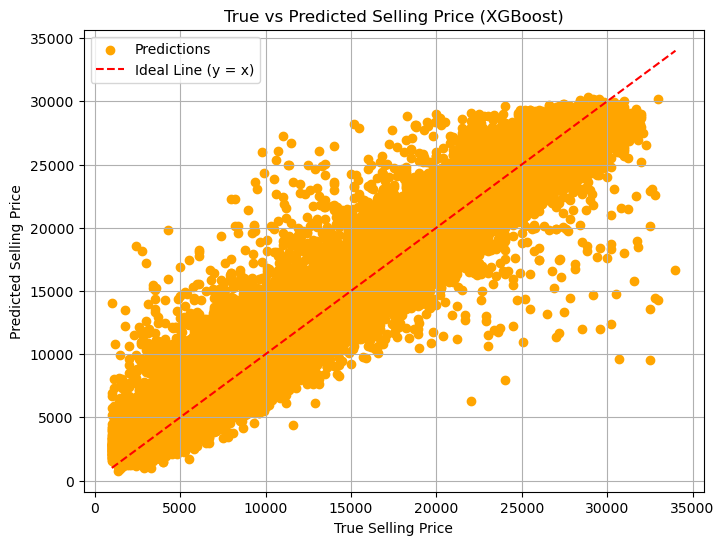

In [ ]:
# True vs Predicted values plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_xgb, y_pred_xgb, color='orange', label='Predictions')
plt.plot([y_test_xgb.min(), y_test_xgb.max()], [y_test_xgb.min(), y_test_xgb.max()], color='red', linestyle='--', label='Ideal Line (y = x)')
plt.title('True vs Predicted Selling Price (XGBoost)')
plt.xlabel('True Selling Price')
plt.ylabel('Predicted Selling Price')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

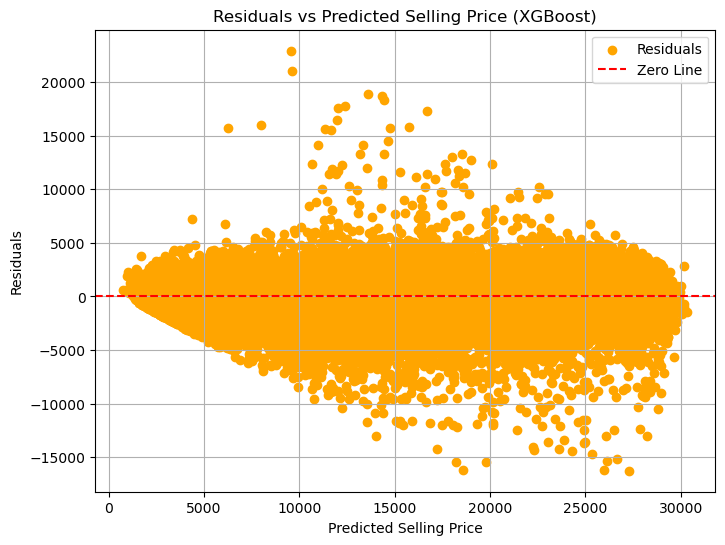

In [ ]:
residuals_xg = y_test_xgb - y_pred_xgb

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_xgb, residuals_xg, color='orange', label='Residuals')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
plt.title('Residuals vs Predicted Selling Price (XGBoost)')
plt.xlabel('Predicted Selling Price')
plt.ylabel('Residuals')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

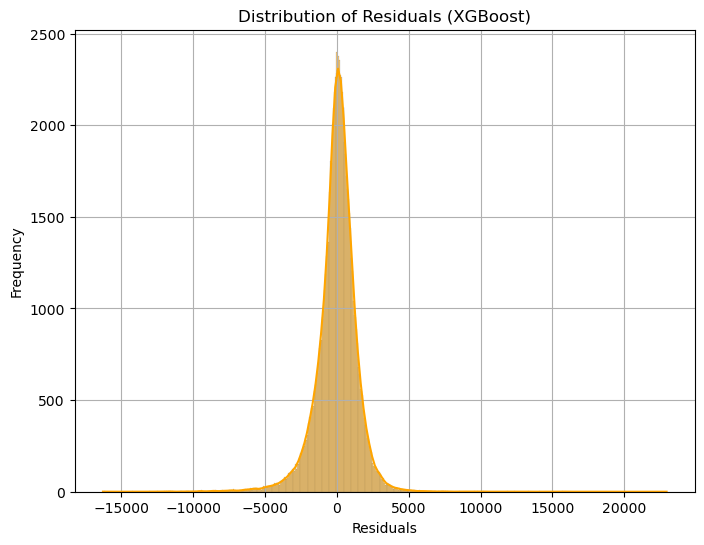

In [ ]:
# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals_xg, kde=True, color='orange')
plt.title('Distribution of Residuals (XGBoost)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Insights and Conclusions:

1. **Model Performance Overview**:
   - **Polynomial Regression**:
     - **R²**: 0.9497
     - **MSE**: 2,268,165.29
     - **MAE**: 1,019.52
     - The Polynomial Regression model provides a solid fit with an R² of 0.95, explaining about 94.97% of the variance in the target variable. However, it has the highest MSE compared to the other models, indicating that while the model fits well, there may be some degree of overfitting or sensitivity to noise.
   
   - **XGBoost**:
     - **R²**: 0.9528
     - **MSE**: 2,128,705.81
     - **RMSE**: 1,459.01
     - XGBoost demonstrates a strong fit with an R² of 0.95, explaining 95.28% of the variance. It performs slightly better than Polynomial Regression in terms of R² and MSE, making it a reliable choice for this dataset. The feature importances indicate that **Market Price** is the most influential feature.

   - **Random Forest**:
     - **R²**: 0.9314 (before optimization) and 0.9501 (after GridSearchCV optimization)
     - **MSE**: 3,075,507.60 (before optimization) and 2,235,701.75 (after optimization)
     - **RMSE**: 1,753.71 (before optimization) and 1,495.23 (after optimization)
     - The Random Forest model performs well, with its performance improving significantly after optimization. After GridSearchCV, it achieves an R² of 0.95, similar to XGBoost, and the MSE reduces, indicating better model performance post-tuning.

   - **Ensemble (LightGBM + XGBoost)**:
     - **R²**: 0.9510
     - **MSE**: 2,211,144.16
     - **RMSE**: 1,486.99
     - The Ensemble model, combining LightGBM and XGBoost, provides an **R² of 0.9510**, outperforming the individual models in terms of predictive power. The MSE and RMSE are also lower than XGBoost, making this the top performer.

2. **Feature Importances**:
   - **Market Price** is the most influential feature across models, especially in **XGBoost** and **LightGBM**, confirming its high relevance in predicting selling price.
   - Other features, such as **Car Brand Name**, **Model**, **Body**, and **State Name**, have considerably lower importance, indicating that they play less of a role in determining the outcome.

3. **Optimization Impact**:
   - **Random Forest** saw significant improvement after parameter optimization, indicating that hyperparameter tuning can enhance model performance, making it comparable to or even on par with XGBoost.

4. **Conclusion**:
   - **XGBoost** and **Ensemble (LightGBM + XGBoost)** models are the best performers, with the **Ensemble model** slightly outperforming the others with the highest R² of 0.9510 and the lowest MSE.
   - **Polynomial Regression** is a good option with a strong R² score but shows higher MSE, suggesting that more sophisticated models (like XGBoost and Random Forest) would likely provide better predictive accuracy.
   - **Random Forest** also performs well, particularly after optimization, making it another strong contender, but it requires tuning to reach the same level as XGBoost and Ensemble models.

Given these findings, it is recommended to use **Ensemble models** (LightGBM + XGBoost) for optimal performance, while **XGBoost** and **Random Forest (after tuning)** remain strong alternative options.

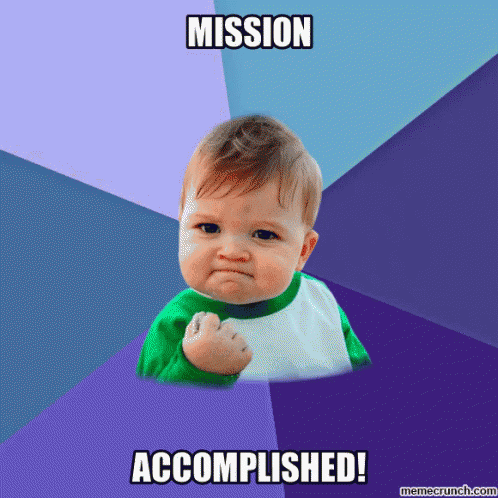